## 0. Imports

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import re
import matplotlib.dates as mdates

### 0.1 Funciones

In [8]:
# Function to plot scatter plots for given DataFrame and parameters
def plot_study_results(df, title, x_param, y_param_value, y_param_duration, additional_params=None):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot value vs x_param
    ax[0].scatter(df[x_param], df[y_param_value], alpha=0.7, edgecolors='w', s=100)
    ax[0].set_title(f'{title} - {y_param_value} vs {x_param}')
    ax[0].set_xlabel(x_param)
    ax[0].set_ylabel(y_param_value)
    ax[0].set_xscale('log')
    ax[0].set_yscale('log')
    
    # Plot duration vs x_param
    ax[1].scatter(df[x_param], df[y_param_duration], alpha=0.7, edgecolors='w', s=100)
    ax[1].set_title(f'{title} - {y_param_duration} vs {x_param}')
    ax[1].set_xlabel(x_param)
    ax[1].set_ylabel(y_param_duration)
    ax[1].set_xscale('log')
    ax[1].set_yscale('log')

    if additional_params:
        for param in additional_params:
            fig, ax = plt.subplots(1, 2, figsize=(16, 6))
            # Plot value vs additional_param
            ax[0].scatter(df[param], df[y_param_value], alpha=0.7, edgecolors='w', s=100)
            ax[0].set_title(f'{title} - {y_param_value} vs {param}')
            ax[0].set_xlabel(param)
            ax[0].set_ylabel(y_param_value)
            ax[0].set_xscale('log')
            ax[0].set_yscale('log')
            
            # Plot duration vs additional_param
            ax[1].scatter(df[param], df[y_param_duration], alpha=0.7, edgecolors='w', s=100)
            ax[1].set_title(f'{title} - {y_param_duration} vs {param}')
            ax[1].set_xlabel(param)
            ax[1].set_ylabel(y_param_duration)
            ax[1].set_xscale('log')
            ax[1].set_yscale('log')

    plt.show()


import pandas as pd

def csv_to_latex_dep(input_csv):
    # Load the CSV file
    df = pd.read_csv(input_csv)

    # Rename columns for clarity
    df.rename(columns={
        'number': 'number',
        'value': '- MSE',
        'datetime_start': 'start',
        'datetime_complete': 'stop',
        'duration': 'duration',
        'params_C': 'C',
        'params_epsilon': 'epsilon',
        'params_kernel': 'kernel',
        'state': 'state'
    }, inplace=True)

    # Reduce the number of decimals to 4 for the required columns
    df['- MSE'] = df['- MSE'].round(4)
    df['C'] = df['C'].round(4)
    df['epsilon'] = df['epsilon'].round(4)

    # Generate the LaTeX table
    latex_table = """
% Please add the following required packages to your document preamble:
% \//usepackage{lscape}
% ////usepackage{longtable}
% Note: It may be necessary to compile the document several times to get a multi-page table to line up properly
\\begin{landscape}
\\begin{longtable}[c]{|c|cccccccc|}
\\hline
number & \\textbf{- MSE} & \\textbf{start} & \\textbf{stop} & \\textbf{duration} & \\textbf{C} & \\textbf{epsilon} & \\textbf{kernel} & \\textbf{state} \\\\ \\hline
\\endfirsthead
%
\\endhead
%
\\hline
\\endfoot
%
\\endlastfoot
%"""

    for index, row in df.iterrows():
        latex_table += f"\\textbf{{{int(row['number'])}}} & {row['- MSE']} & {row['start']} & {row['stop']} & {row['duration']} & {row['C']} & {row['epsilon']} & {row['kernel']} & {row['state']} \\\\ \\hline\n"

    latex_table += """
\\caption{Grid de optuna: SVR, predicción a 4h. Kernel lineal.}
\\label{tab:SVR-4h-RBF-grid}
\\end{longtable}
\\end{landscape}
"""

    # Print the LaTeX table
    print(latex_table)



In [9]:
def csv_to_latex(input_csv):
    # Extract the kernel and X value from the filename
    match = re.search(r'_(\w+)_(\d+)H\.csv$', input_csv)
    if match:
        kernel = match.group(1)
        hours = match.group(2)
    else:
        kernel = 'kernel'
        hours = 'X'  # Default values if the pattern does not match

    # Load the CSV file
    df = pd.read_csv(input_csv)

    # Rename columns for clarity
    df.rename(columns={
        'number': 'number',
        'value': '- MSE',
        'datetime_start': 'start',
        'datetime_complete': 'stop',
        'duration': 'duration',
        'params_C': 'C',
        'params_epsilon': 'epsilon',
        'params_kernel': 'kernel',
        'state': 'state'
    }, inplace=True)

    # Reduce the number of decimals to 4 for the required columns
    df['- MSE'] = df['- MSE'].round(4)
    df['C'] = df['C'].round(4)
    df['epsilon'] = df['epsilon'].round(4)

    # Remove "2024-07-20 " from start and stop, and "0 days " from duration
    df['start'] = df['start'].str.replace("2024-07-20 ", "")
    df['stop'] = df['stop'].str.replace("2024-07-20 ", "")
    df['duration'] = df['duration'].str.replace("0 days ", "")

    # Generate the LaTeX table
    latex_table = f"""
% Please add the following required packages to your document preamble:
% \\usepackage{{lscape}}
% \\usepackage{{longtable}}
% Note: It may be necessary to compile the document several times to get a multi-page table to line up properly
\\begin{{landscape}}
\\begin{{longtable}}[c]{{|c|cccccccc|}}
\\hline
number & \\textbf{{- MSE}} & \\textbf{{start}} & \\textbf{{stop}} & \\textbf{{duration}} & \\textbf{{C}} & \\textbf{{epsilon}} & \\textbf{{kernel}} & \\textbf{{state}} \\\\ \\hline
\\endfirsthead
%
\\endhead
%
\\hline
\\endfoot
%
\\endlastfoot
%"""

    for index, row in df.iterrows():
        latex_table += f"\\textbf{{{int(row['number'])}}} & {row['- MSE']} & {row['start']} & {row['stop']} & {row['duration']} & {row['C']} & {row['epsilon']} & {row['kernel']} & {row['state']} \\\\ \\hline\n"

    latex_table += f"""
\\caption{{Grid de optuna: SVR, predicción a {hours}h. Kernel {kernel}.}}
\\label{{tab:SVR-{hours}h-{kernel}-grid}}
\\end{{longtable}}
\\end{{landscape}}
"""

    # Print the LaTeX table
    print(latex_table)

### 0.2. Datos

In [10]:
grid_LINEAR_2h='C://Users//raqga//OneDrive - Universidad Complutense de Madrid (UCM)//Documentos//tsa4dst//RESULTADOS//csv_resultados_optuna_SVR//optuna_study_results_LINEAR_2H.csv'
grid_LINEAR_4h='C://Users//raqga//OneDrive - Universidad Complutense de Madrid (UCM)//Documentos//tsa4dst//RESULTADOS//csv_resultados_optuna_SVR//optuna_study_results_LINEAR_4H.csv'
grid_LINEAR_6h='C://Users//raqga//OneDrive - Universidad Complutense de Madrid (UCM)//Documentos//tsa4dst//RESULTADOS//csv_resultados_optuna_SVR//optuna_study_results_LINEAR_6H.csv'
grid_RBF_2h='C://Users//raqga//OneDrive - Universidad Complutense de Madrid (UCM)//Documentos//tsa4dst//RESULTADOS//csv_resultados_optuna_SVR//optuna_study_results_RBF_2H.csv'
grid_RBF_4h='C://Users//raqga//OneDrive - Universidad Complutense de Madrid (UCM)//Documentos//tsa4dst//RESULTADOS//csv_resultados_optuna_SVR//optuna_study_results_RBF_4H.csv'
grid_RBF_6h='C://Users//raqga//OneDrive - Universidad Complutense de Madrid (UCM)//Documentos//tsa4dst//RESULTADOS//csv_resultados_optuna_SVR//optuna_study_results_RBF_6H.csv'
grid_POLY_2h='C://Users//raqga//OneDrive - Universidad Complutense de Madrid (UCM)//Documentos//tsa4dst//RESULTADOS//csv_resultados_optuna_SVR//optuna_study_results_POLY_2H.csv'
grid_POLY_4h='C://Users//raqga//OneDrive - Universidad Complutense de Madrid (UCM)//Documentos//tsa4dst//RESULTADOS//csv_resultados_optuna_SVR//optuna_study_results_POLY_4H.csv'
grid_POLY_6h='C://Users//raqga//OneDrive - Universidad Complutense de Madrid (UCM)//Documentos//tsa4dst//RESULTADOS//csv_resultados_optuna_SVR//optuna_study_results_POLY_6H.csv'


## 1. Resultados

In [11]:
ensayos_2h = pd.read_csv(grid_linear_2h)
ensayos_4h = pd.read_csv(grid_linear_4h)
ensayos_6h = pd.read_csv(grid_linear_6h)

NameError: name 'grid_linear_2h' is not defined

In [ ]:
ensayos_2h.head()

Unnamed: 0  number      value              datetime_start  \
0           0       0  15.382039  2024-07-20 15:03:59.595673   
1           1       1   0.091060  2024-07-20 15:03:59.800140   
2           2       2   0.092624  2024-07-20 15:04:03.667575   
3           3       3        NaN  2024-07-20 15:04:10.094557   
4           4       4   0.113526  2024-07-20 15:06:10.245238   

            datetime_complete                duration   params_C  \
0  2024-07-20 15:03:59.754525  0 days 00:00:00.158852  19.306977   
1  2024-07-20 15:04:03.531936  0 days 00:00:03.731796   0.026827   
2  2024-07-20 15:04:10.055316  0 days 00:00:06.387741   0.026827   
3  2024-07-20 15:06:10.214667  0 days 00:02:00.120110   3.727594   
4  2024-07-20 15:06:12.680456  0 days 00:00:02.435218   0.001000   

   params_epsilon params_kernel  system_attrs_grid_id  \
0         10.0000        linear                     0   
1          0.1000        linear                     1   
2          0.0001        linear                     2   
3          0.0100        linear                     3   
4          0.0001        linear                     4   

                           system_attrs_search_space     state  
0  {'C': [0.001, 0.005179474679231213, 0.02682695...  COMPLETE  
1  {'C': [0.001, 0.005179474679231213, 0.02682695...  COMPLETE  
2  {'C': [0.001, 0.005179474679231213, 0.02682695...  COMPLETE  
3  {'C': [0.001, 0.005179474679231213, 0.02682695...      FAIL  
4  {'C': [0.001, 0.005179474679231213, 0.02682695...  COMPLETE

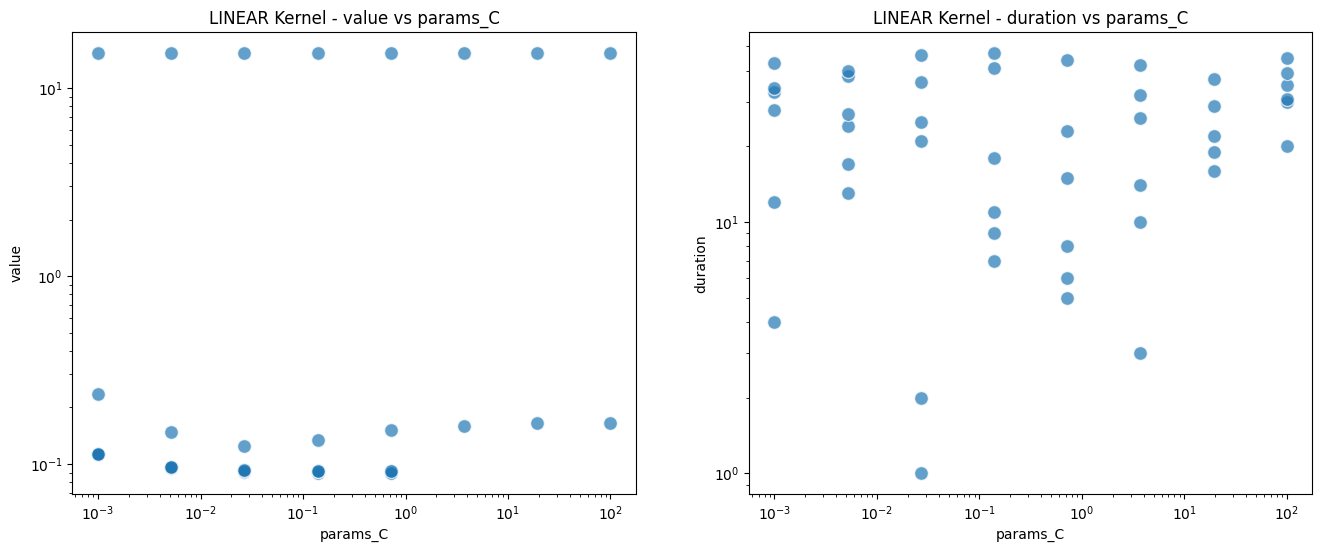

In [ ]:
# Plot results for LINEAR
plot_study_results(ensayos_2h, "LINEAR Kernel", "params_C", "value", "duration")


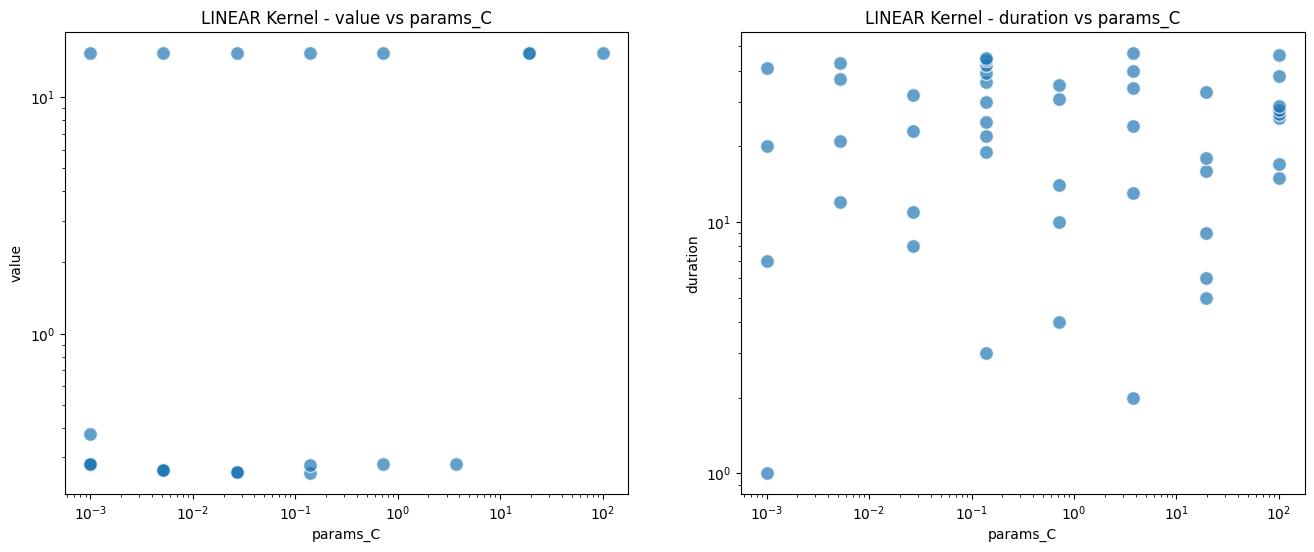

In [ ]:
plot_study_results(ensayos_4h, "LINEAR Kernel", "params_C", "value", "duration")

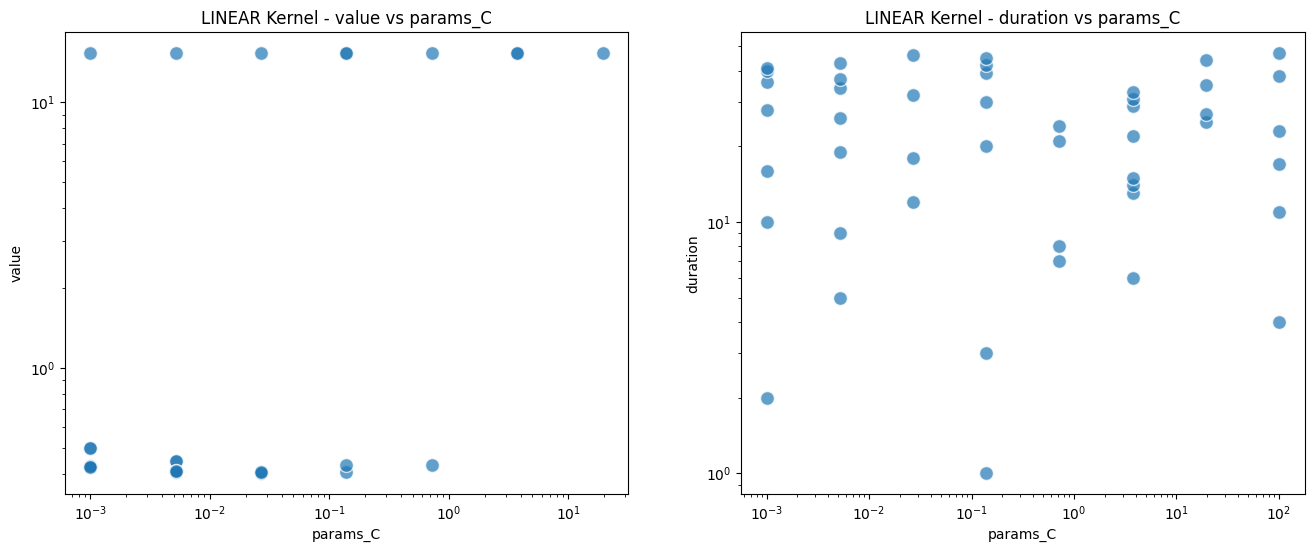

In [ ]:
plot_study_results(ensayos_6h, "LINEAR Kernel", "params_C", "value", "duration")

In [ ]:
csv_to_latex(grid_LINEAR_4h)


% Please add the following required packages to your document preamble:
% \usepackage{lscape}
% \usepackage{longtable}
% Note: It may be necessary to compile the document several times to get a multi-page table to line up properly
\begin{landscape}
\begin{longtable}[c]{|c|cccccccc|}
\hline
number & \textbf{- MSE} & \textbf{start} & \textbf{stop} & \textbf{duration} & \textbf{C} & \textbf{epsilon} & \textbf{kernel} & \textbf{state} \\ \hline
\endfirsthead
%
\endhead
%
\hline
\endfoot
%
\endlastfoot
%\textbf{0} & 0.3748 & 13:12:22.517932 & 13:12:23.430924 & 00:00:00.912992 & 0.001 & 1.0 & linear & COMPLETE \\ \hline
\textbf{1} & 0.2782 & 13:12:23.552645 & 13:12:36.337164 & 00:00:12.784519 & 0.001 & 0.1 & linear & COMPLETE \\ \hline
\textbf{2} & nan & 13:12:36.481753 & 13:14:36.694061 & 00:02:00.212308 & 3.7276 & 0.1 & linear & FAIL \\ \hline
\textbf{3} & 0.2573 & 13:14:36.772522 & 13:15:27.884128 & 00:00:51.111606 & 0.1389 & 0.1 & linear & COMPLETE \\ \hline
\textbf{4} & 15.3545 & 13:15

# 2. Nuevas gráficas

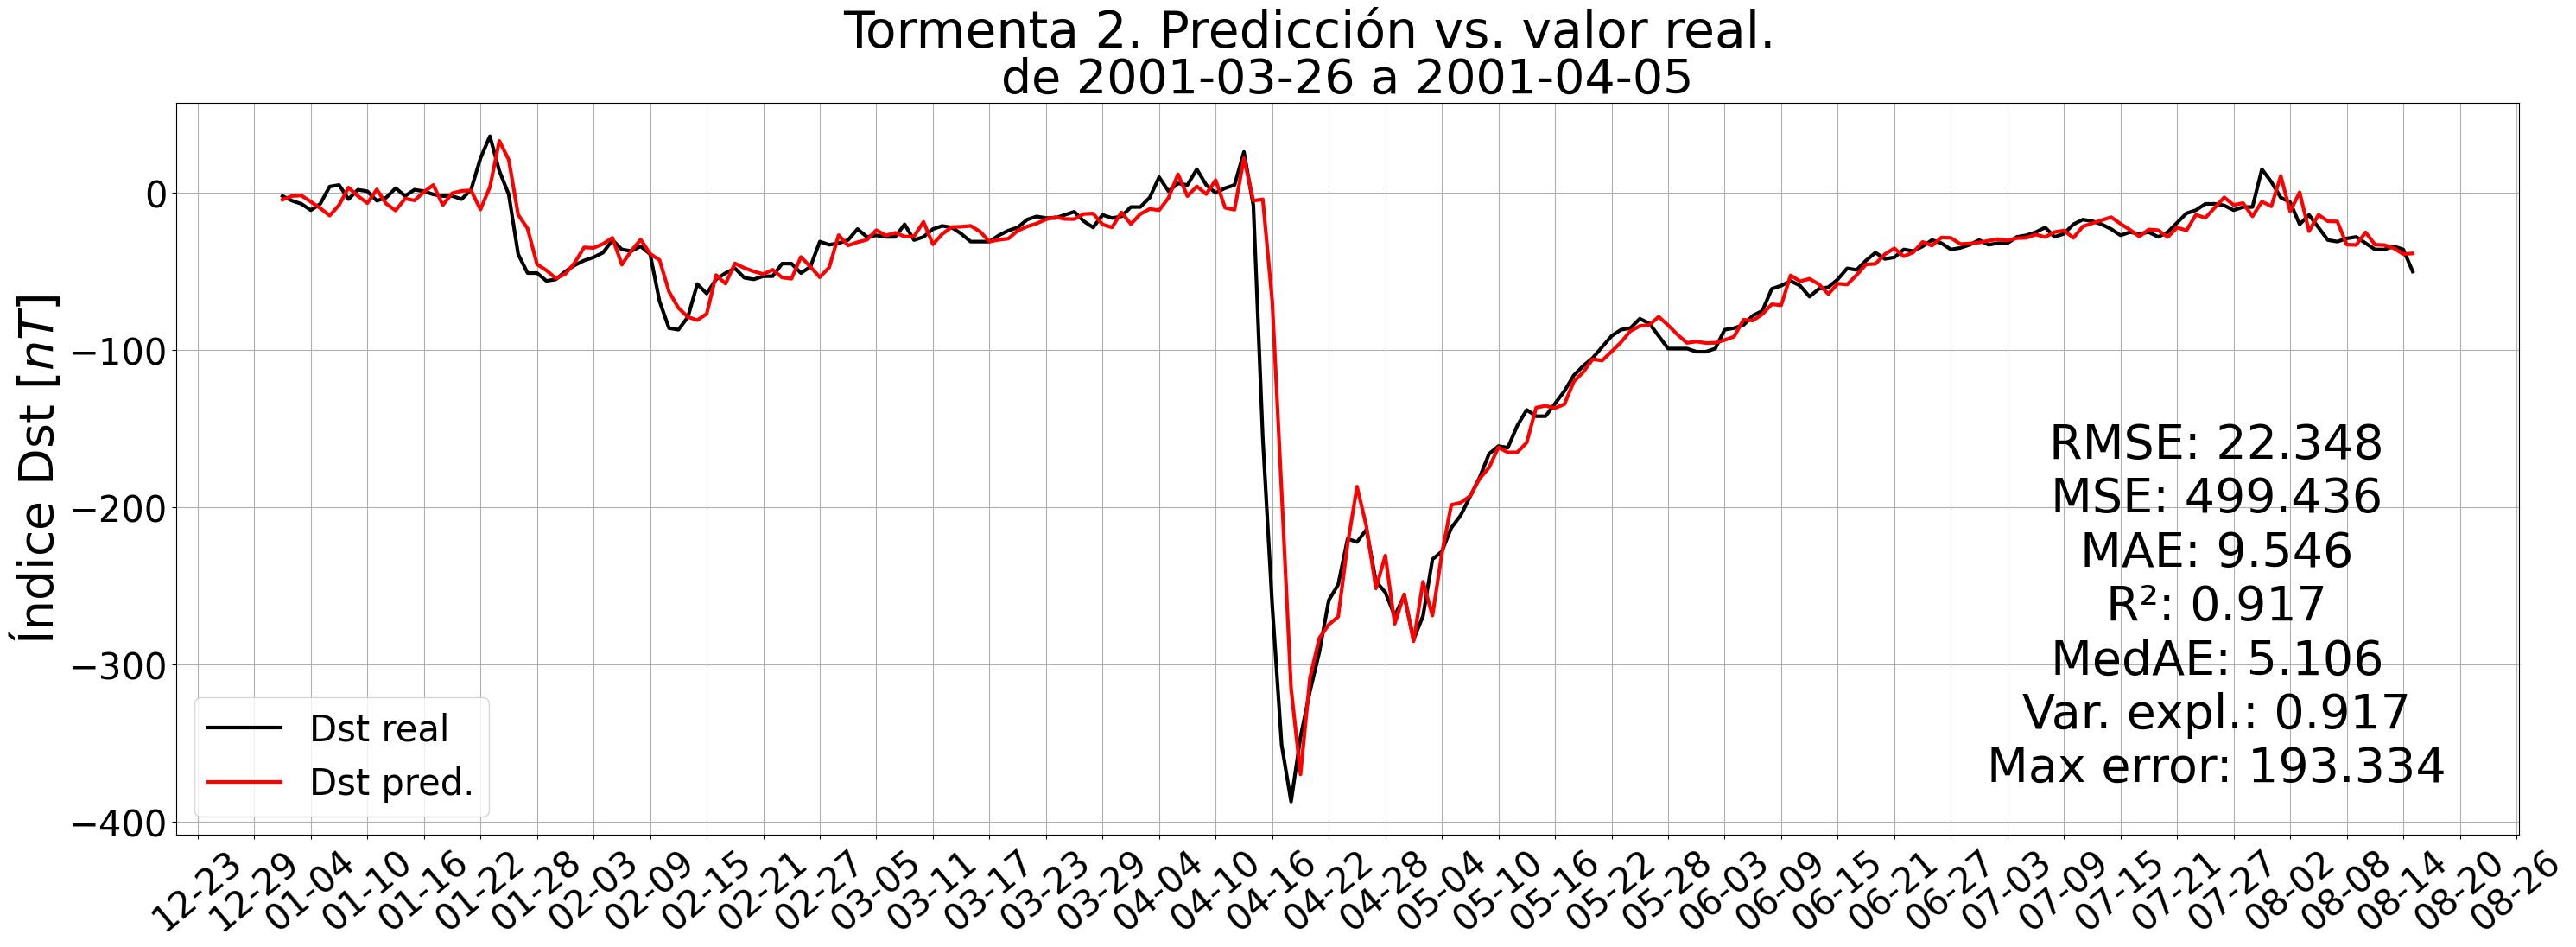

In [ ]:


# Leer los datos
data = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_2h_res_by_storm/storm_1.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data['Datetime_pred'], data['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data['Datetime_pred'], data['y_pred'], label='Dst pred.', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('de 2001-03-26 a 2001-04-05', fontsize=40)
plt.suptitle('Tormenta 2. Predicción vs. valor real.', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)

# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Métricas
metrics = {
    "RMSE": 22.348063,
    "MSE": 499.435932,
    "MAE": 9.546276,
    "R²": 0.916815,
    "MedAE": 5.105864,
    "Var. expl.": 0.917468,
    "Max error": 193.333819
}

# Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
metrics_text = "\n".join([f"{key}: {value:.3f}" for key, value in metrics.items()])
plt.gcf().text(0.80, 0.35, metrics_text, fontsize=40, ha='center', va='center')


# Mostrar el gráfico
plt.show()


In [ ]:
metrics = {
    "RMSE": 6.446796,
    "MSE": 41.561179,
    "MAE": 4.548034,
    "R²": 0.888788,
    "MedAE": 3.405757,
    "Var. expl.": 0.889212,
    "Max error": 32.028786
}


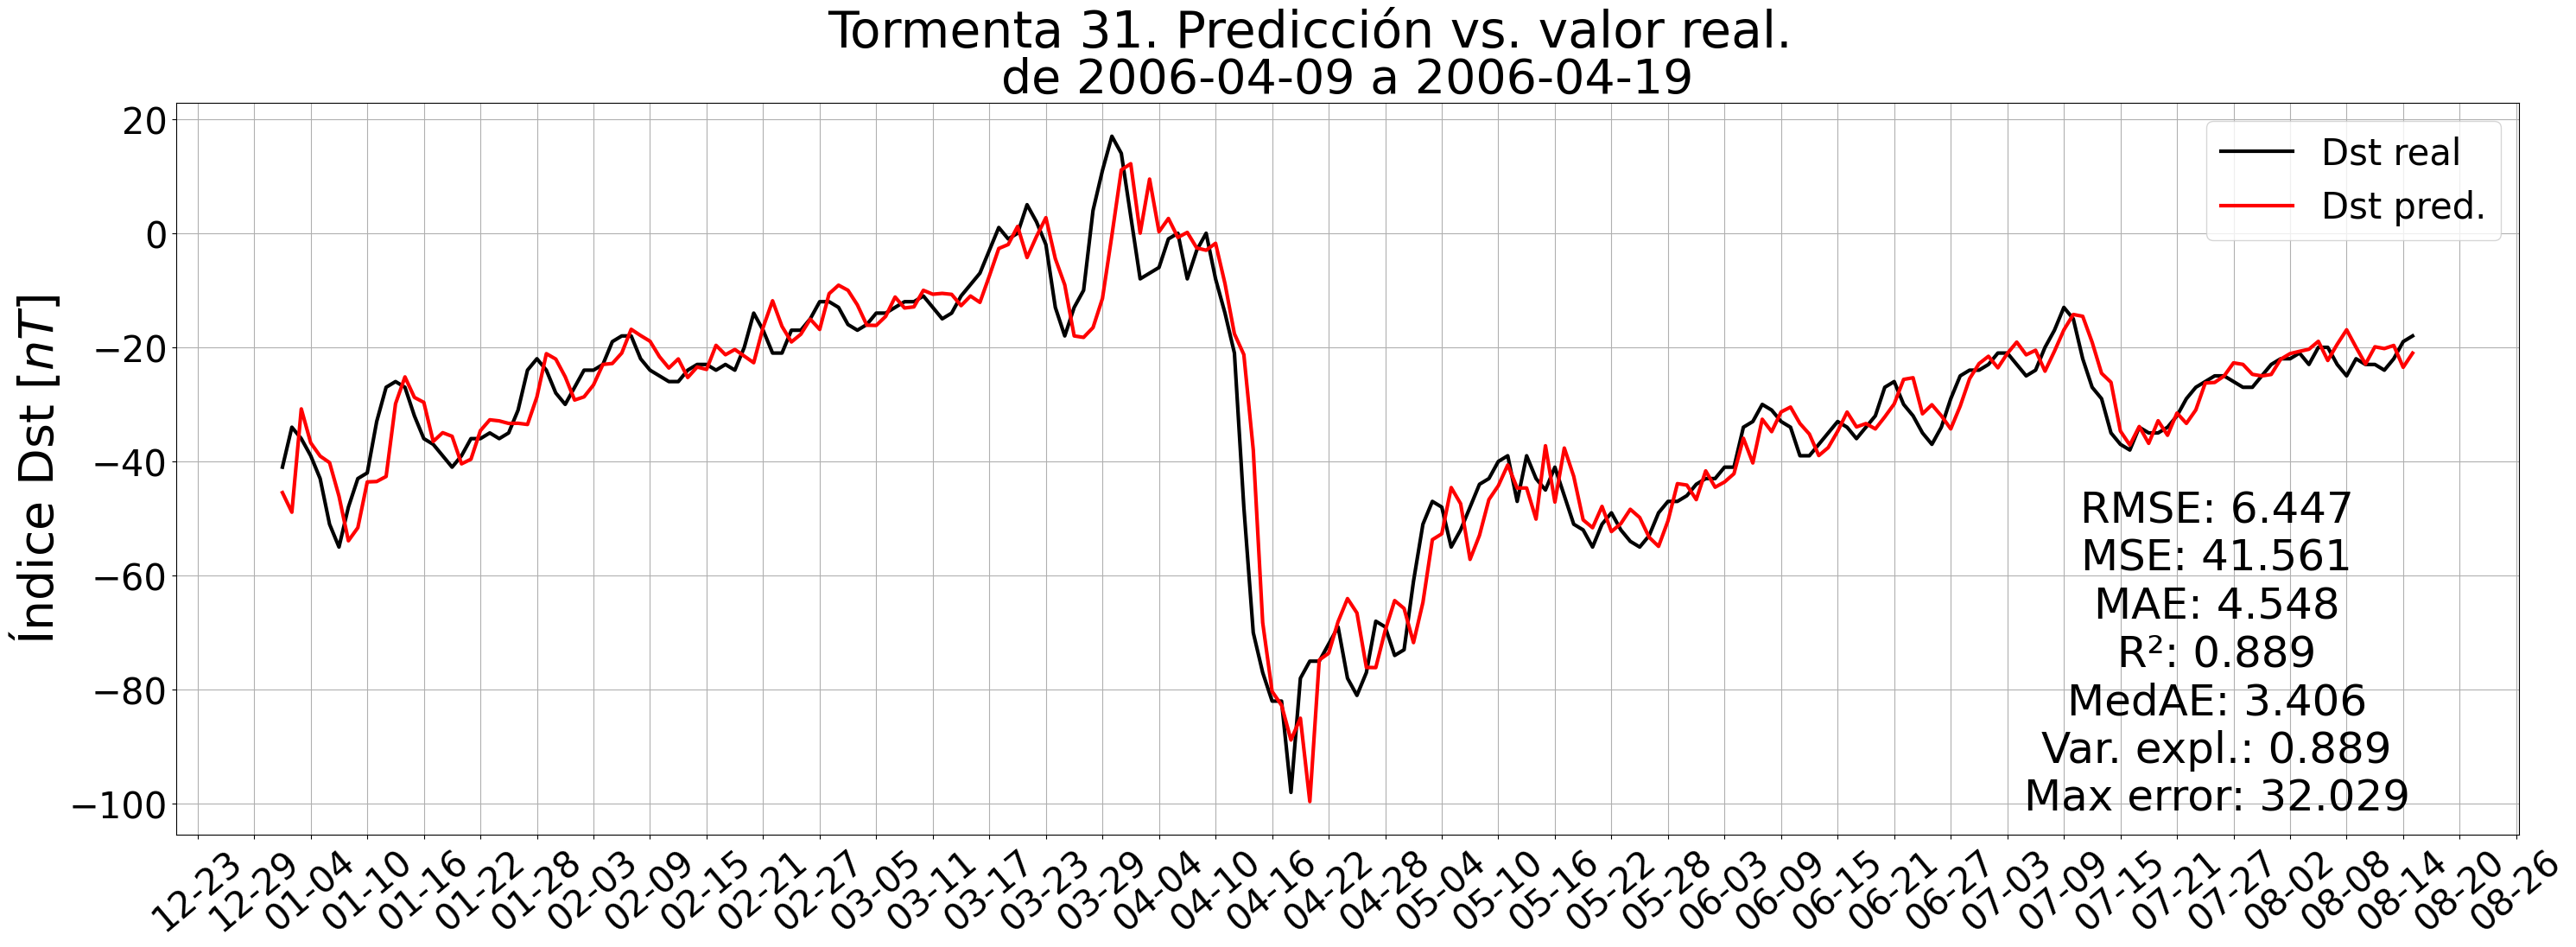

In [ ]:

# Leer los datos
data = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_2h_res_by_storm/storm_6.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data['Datetime_pred'], data['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data['Datetime_pred'], data['y_pred'], label='Dst pred.', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('de 2006-04-09 a 2006-04-19', fontsize=40)
plt.suptitle('Tormenta 31. Predicción vs. valor real.', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)

# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


# Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
metrics_text = "\n".join([f"{key}: {value:.3f}" for key, value in metrics.items()])
plt.gcf().text(0.80, 0.30, metrics_text, fontsize=36, ha='center', va='center')


# Mostrar el gráfico
plt.show()


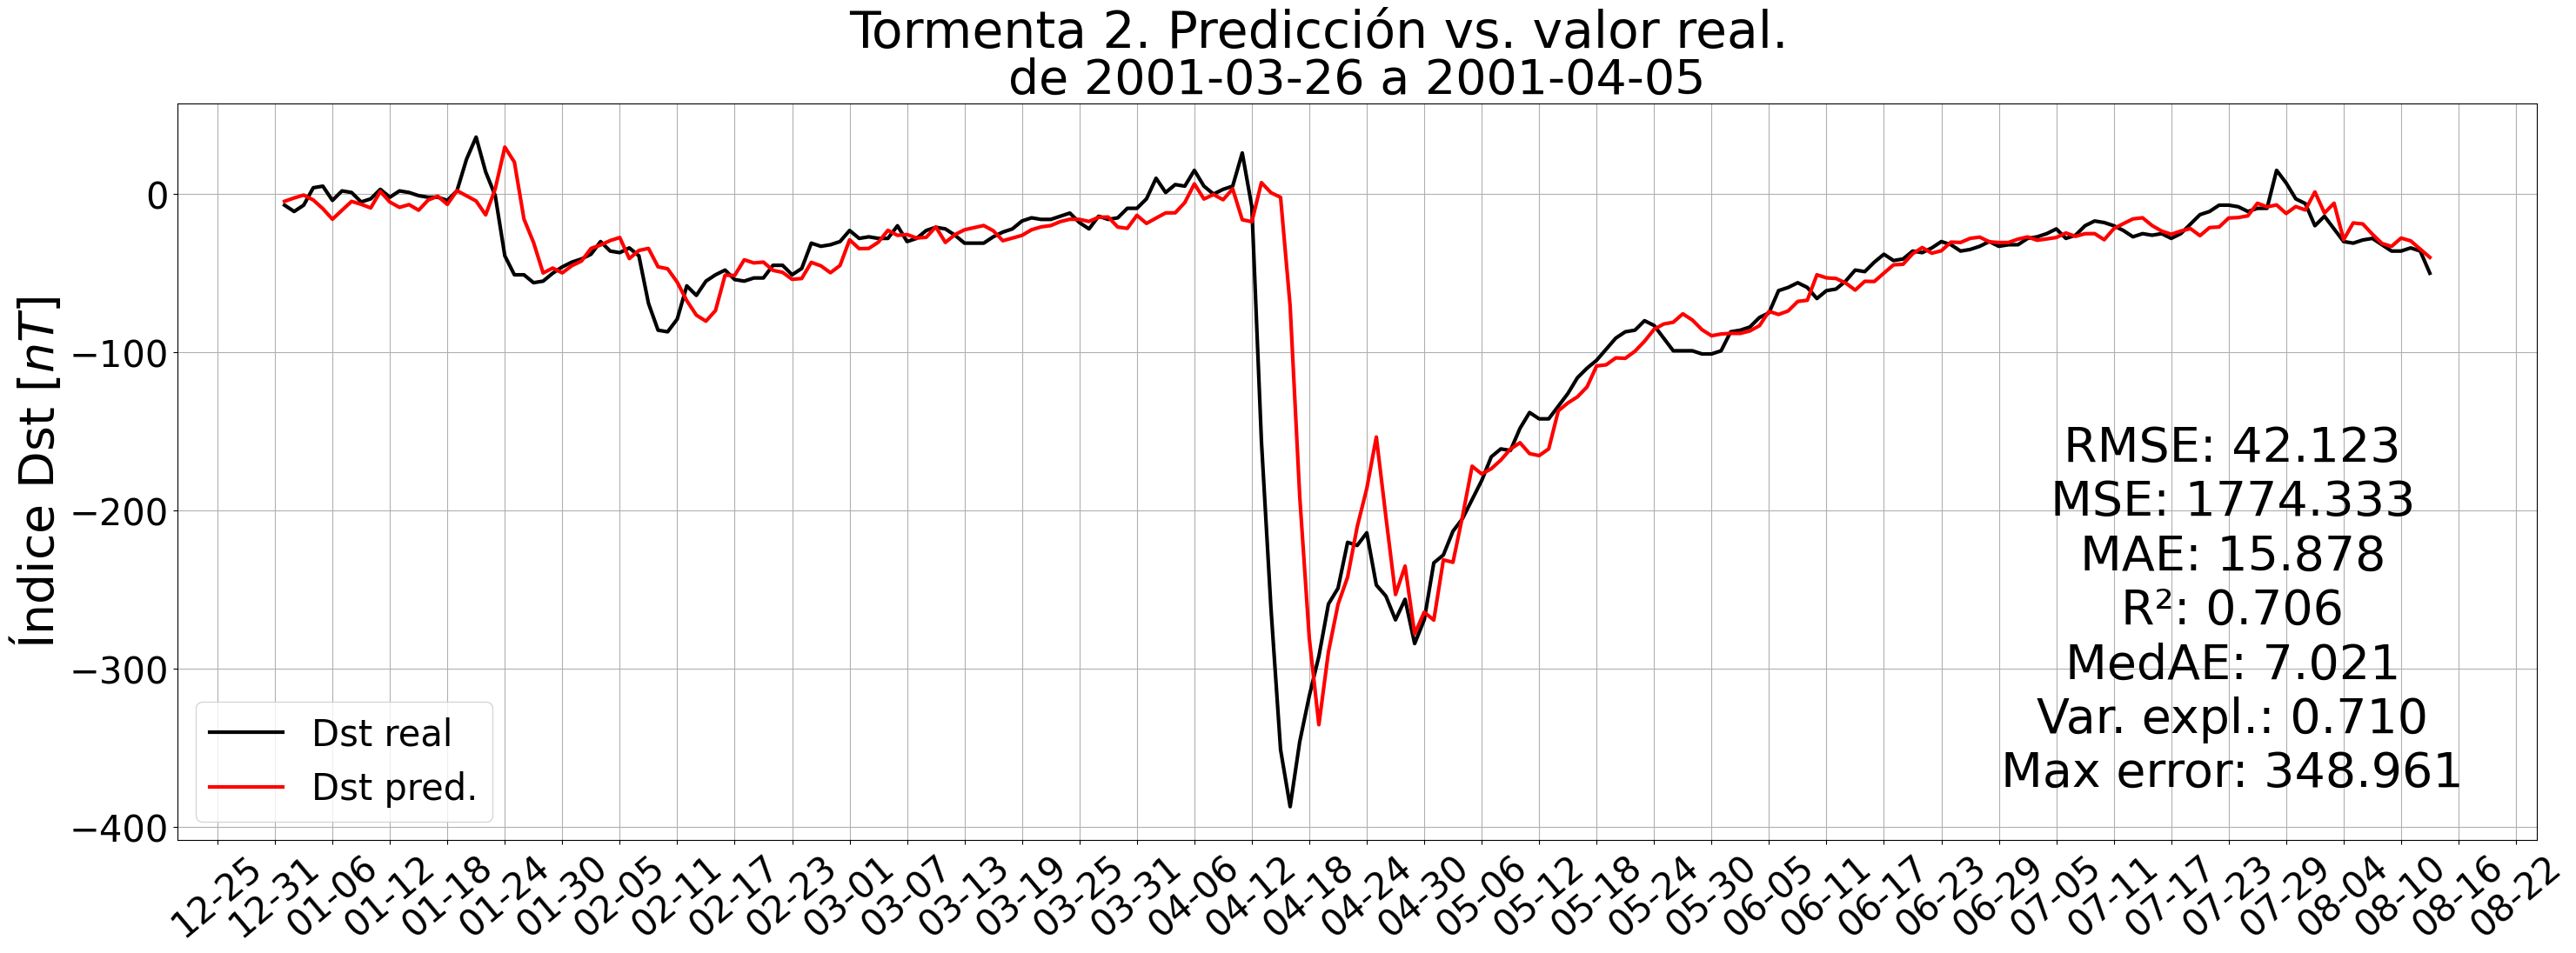

In [ ]:


# Leer los datos
data = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_4h_res_by_storm/storm_1.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data['Datetime_pred'], data['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data['Datetime_pred'], data['y_pred'], label='Dst pred.', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('de 2001-03-26 a 2001-04-05', fontsize=40)
plt.suptitle('Tormenta 2. Predicción vs. valor real.', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)

# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

metrics = {
    "RMSE": 42.122828,
    "MSE": 1774.332639,
    "MAE": 15.878248,
    "R²": 0.705656,
    "MedAE": 7.021298,
    "Var. expl.": 0.709521,
    "Max error": 348.960677
}

# Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
metrics_text = "\n".join([f"{key}: {value:.3f}" for key, value in metrics.items()])
plt.gcf().text(0.80, 0.35, metrics_text, fontsize=40, ha='center', va='center')


# Mostrar el gráfico
plt.show()


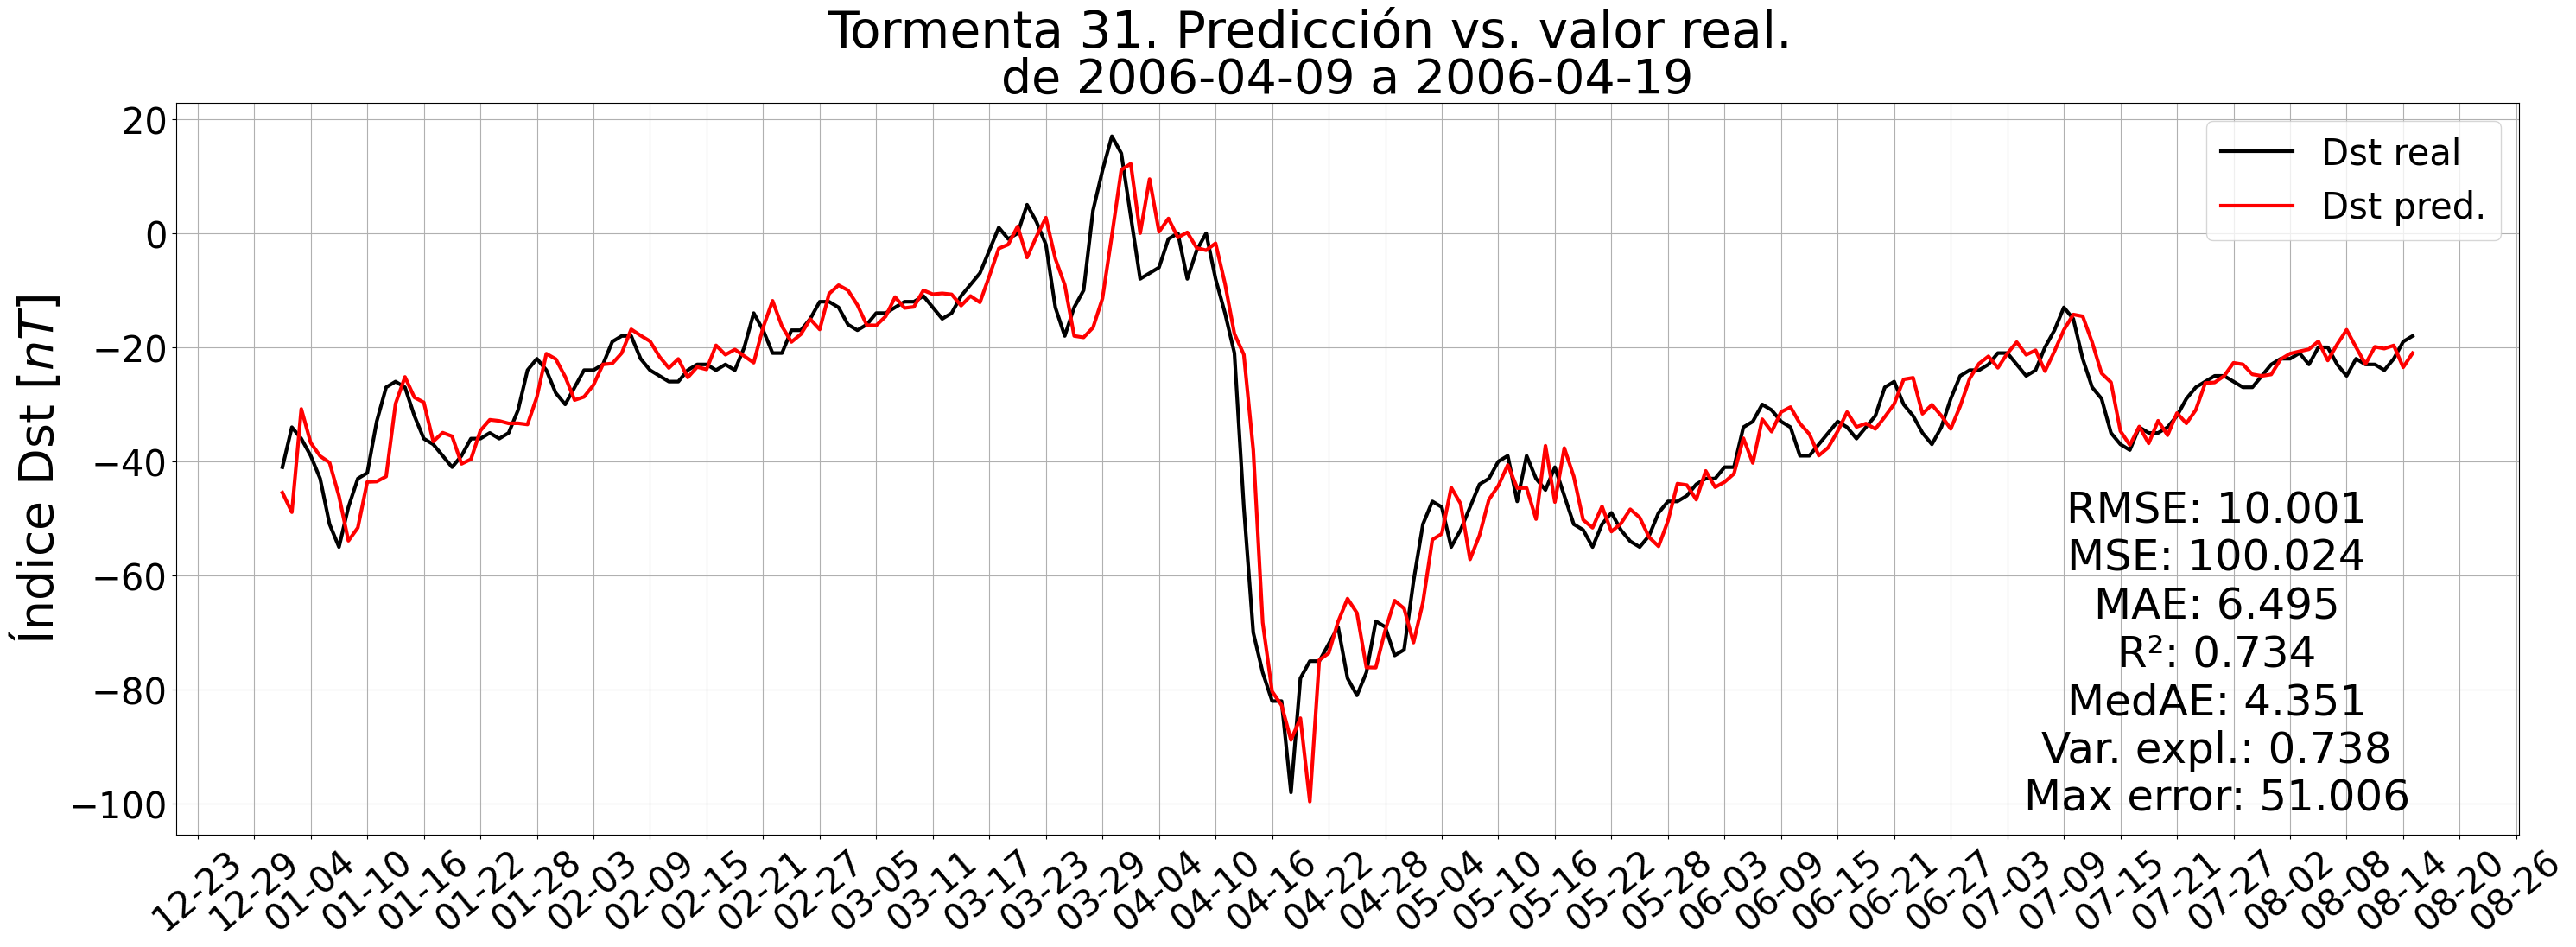

In [ ]:

# Leer los datos
data = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_2h_res_by_storm/storm_6.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data['Datetime_pred'], data['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data['Datetime_pred'], data['y_pred'], label='Dst pred.', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('de 2006-04-09 a 2006-04-19', fontsize=40)
plt.suptitle('Tormenta 31. Predicción vs. valor real.', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)

metrics = {
    "RMSE": 10.001184,
    "MSE": 100.023672,
    "MAE": 6.494653,
    "R²": 0.734339,
    "MedAE": 4.351076,
    "Var. expl.": 0.738096,
    "Max error": 51.005644
}


# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


# Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
metrics_text = "\n".join([f"{key}: {value:.3f}" for key, value in metrics.items()])
plt.gcf().text(0.80, 0.30, metrics_text, fontsize=36, ha='center', va='center')


# Mostrar el gráfico
plt.show()


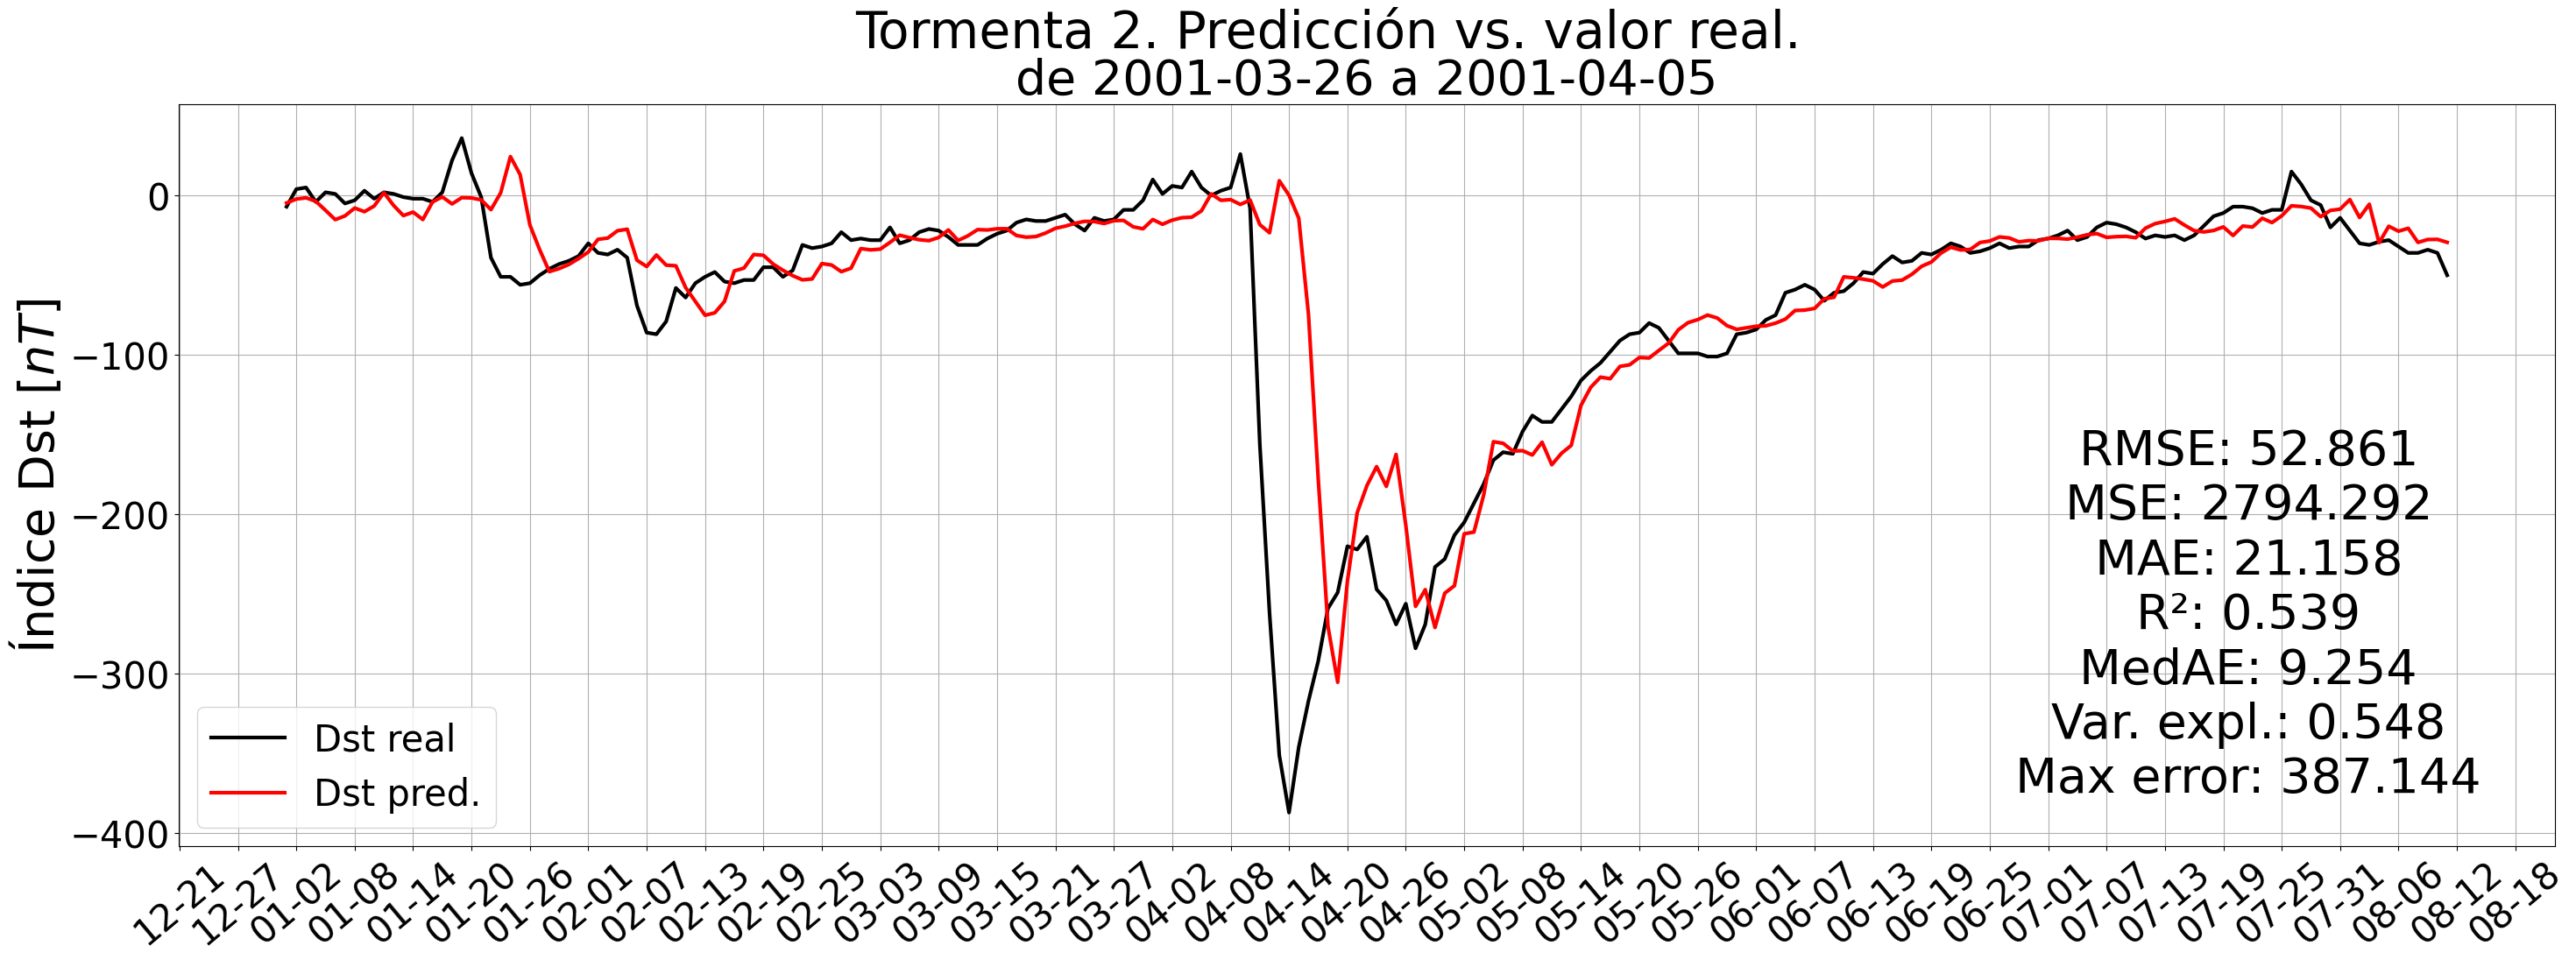

In [ ]:


# Leer los datos
data = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_6h_res_by_storm/storm_1.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data['Datetime_pred'], data['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data['Datetime_pred'], data['y_pred'], label='Dst pred.', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('de 2001-03-26 a 2001-04-05', fontsize=40)
plt.suptitle('Tormenta 2. Predicción vs. valor real.', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)

# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

metrics = {
    "RMSE": 52.861062,
    "MSE": 2794.291830,
    "MAE": 21.158415,
    "R²": 0.538713,
    "MedAE": 9.254333,
    "Var. expl.": 0.548496,
    "Max error": 387.143790
}


# Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
metrics_text = "\n".join([f"{key}: {value:.3f}" for key, value in metrics.items()])
plt.gcf().text(0.80, 0.35, metrics_text, fontsize=40, ha='center', va='center')


# Mostrar el gráfico
plt.show()


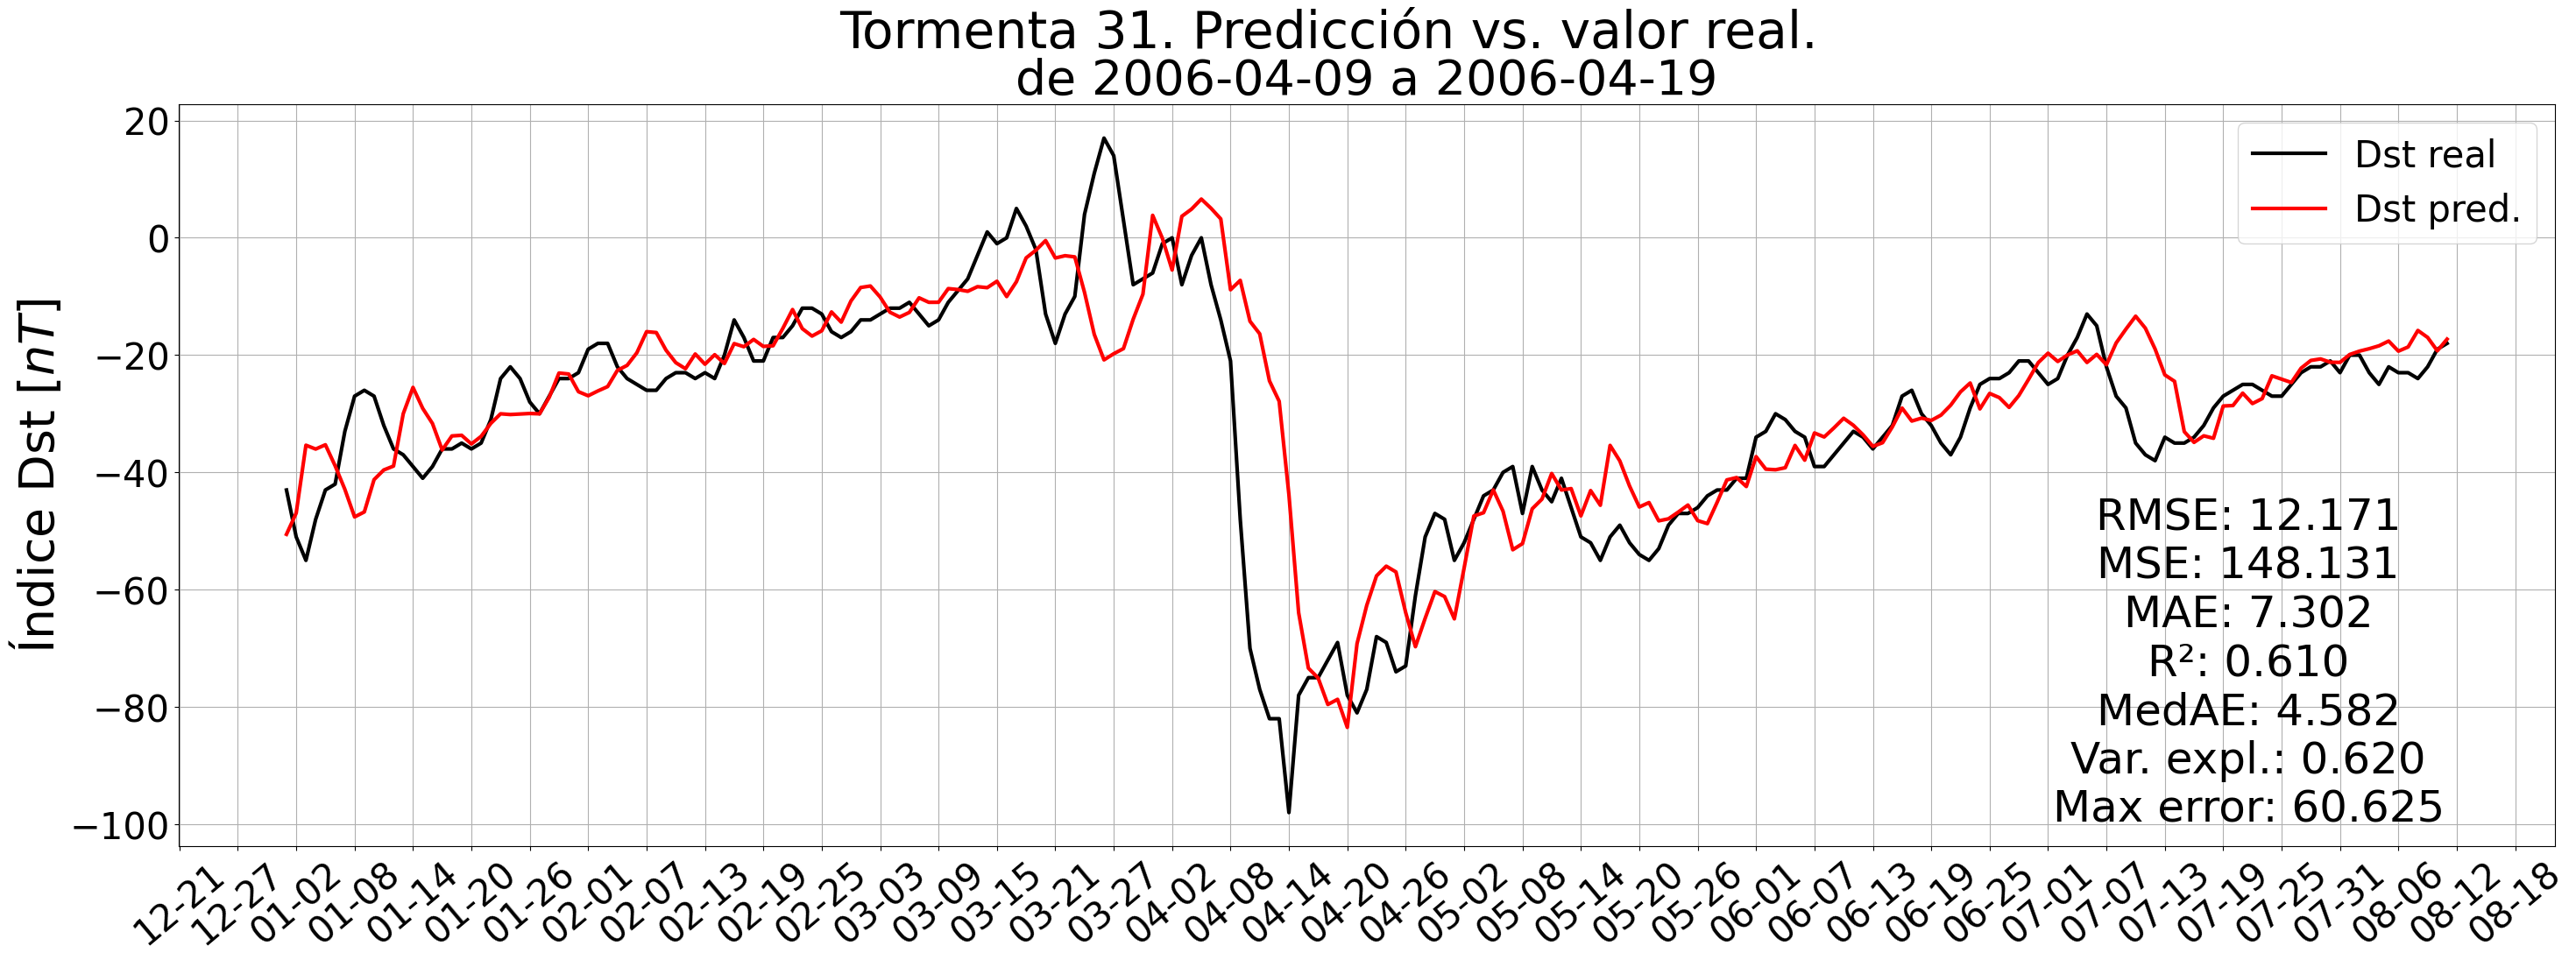

In [ ]:

# Leer los datos
data = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_6h_res_by_storm/storm_6.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data['Datetime_pred'], data['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data['Datetime_pred'], data['y_pred'], label='Dst pred.', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('de 2006-04-09 a 2006-04-19', fontsize=40)
plt.suptitle('Tormenta 31. Predicción vs. valor real.', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)

metrics = {
    "RMSE": 12.170907,
    "MSE": 148.130972,
    "MAE": 7.301753,
    "R²": 0.609604,
    "MedAE": 4.582333,
    "Var. expl.": 0.619746,
    "Max error": 60.625490
}



# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


# Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
metrics_text = "\n".join([f"{key}: {value:.3f}" for key, value in metrics.items()])
plt.gcf().text(0.80, 0.30, metrics_text, fontsize=36, ha='center', va='center')


# Mostrar el gráfico
plt.show()


## LSTM vs SVR

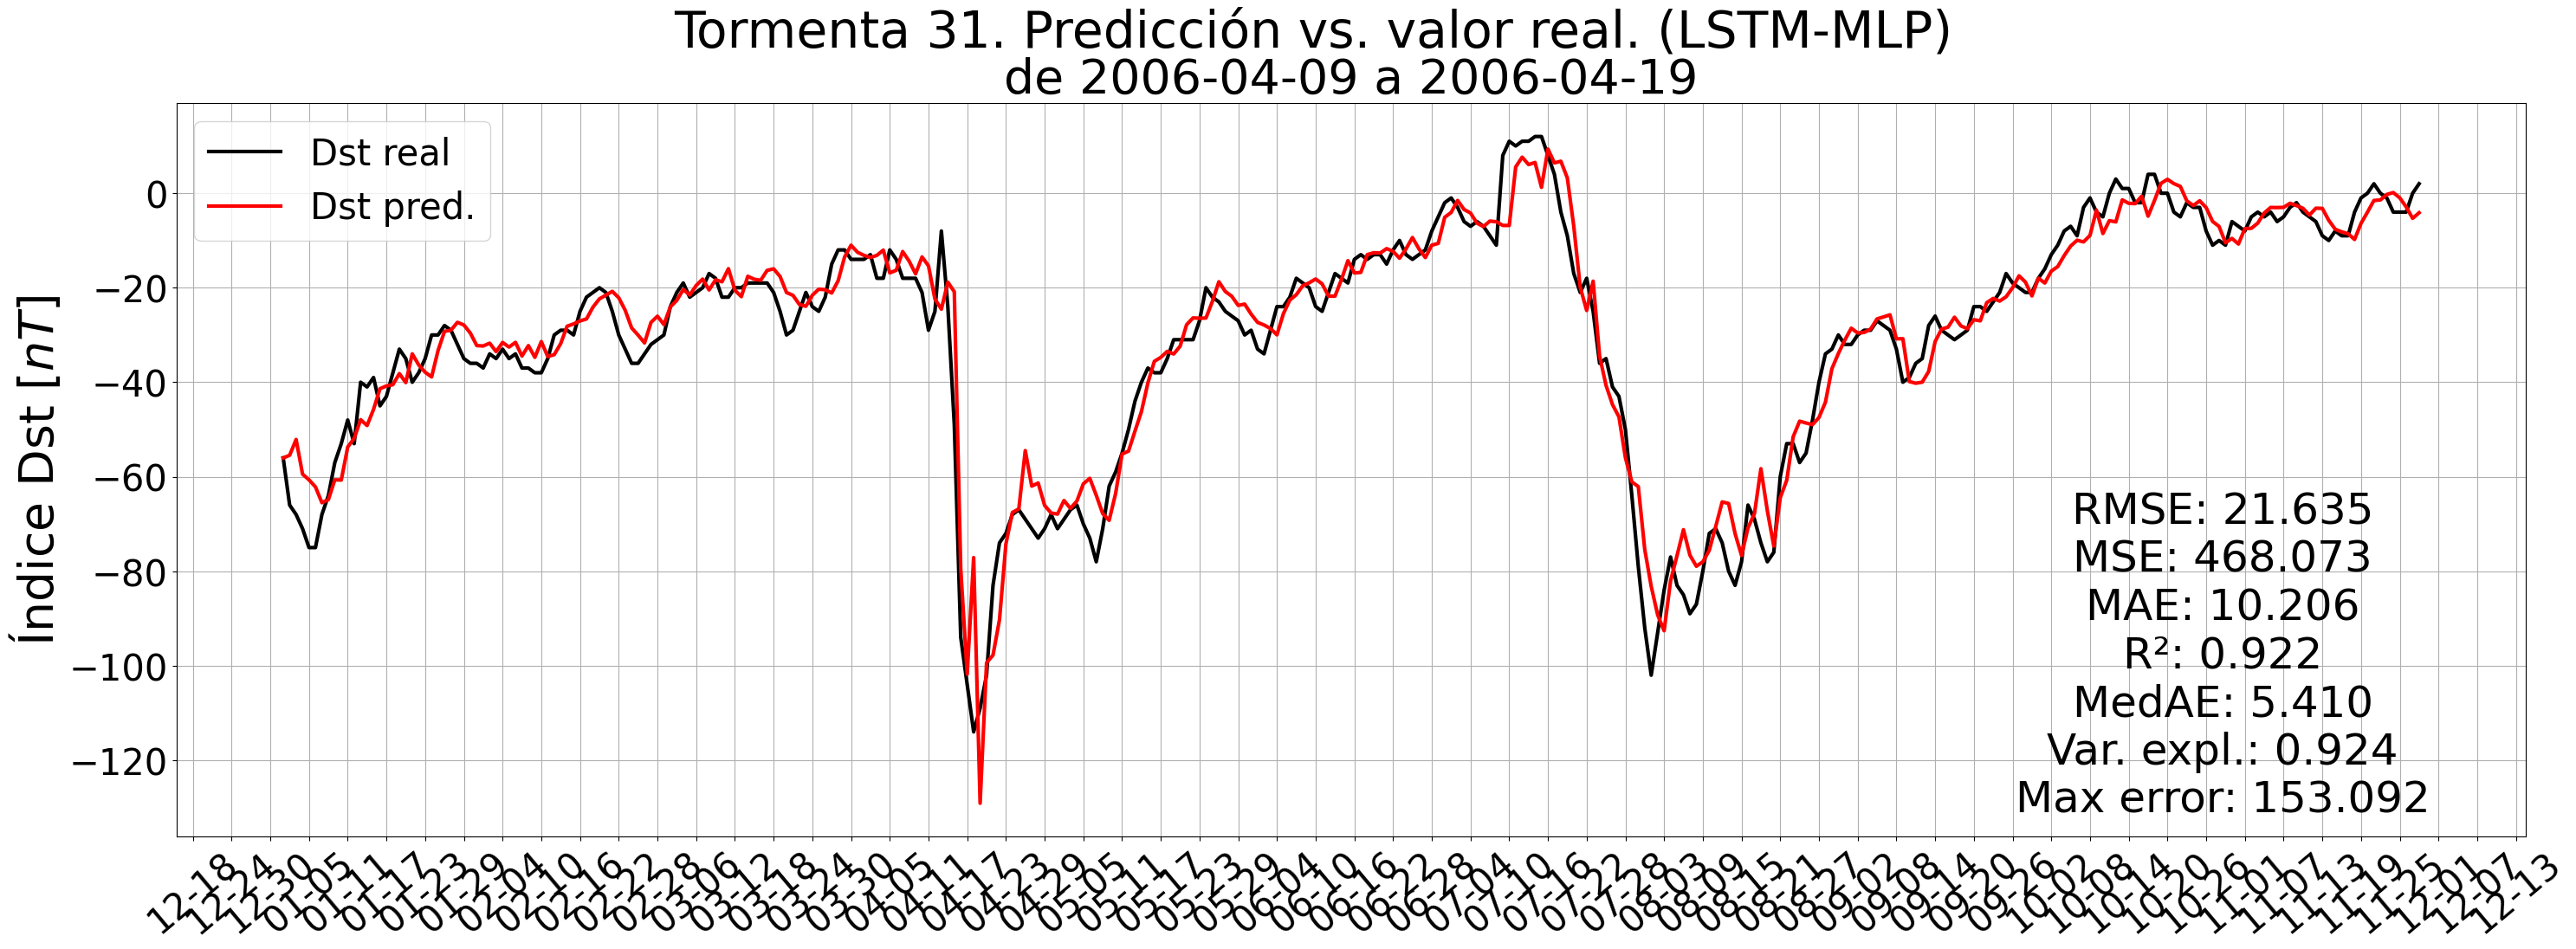

\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|}
\hline
Métrica & LSTM & SVR \\
\hline
RMSE & 21.635 & 22.348 \\
MSE & 468.073 & 499.436 \\
MAE & 10.206 & 9.546 \\
R² & 0.922 & 0.917 \\
MedAE & 5.410 & 5.106 \\
Var. expl. & 0.924 & 0.917 \\
Max error & 153.092 & 193.334 \\
\hline
\end{tabular}
\caption{Comparación de métricas entre LSTM y SVR}
\end{table}


In [ ]:

# Leer los datos
data = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/NN_2h_res_by_storm/storm_2.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data['Datetime_pred'], data['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data['Datetime_pred'], data['y_pred'], label='Dst pred.', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('de 2006-04-09 a 2006-04-19', fontsize=40)
plt.suptitle('Tormenta 31. Predicción vs. valor real. (LSTM-MLP)', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)


# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


# Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
metrics_text = "\n".join([f"{key}: {value:.3f}" for key, value in metrics.items()])
plt.gcf().text(0.80, 0.30, metrics_text, fontsize=36, ha='center', va='center')


# Mostrar el gráfico
plt.show()

metrics_SVR = {
    "RMSE": 22.348063,
    "MSE": 499.435932,
    "MAE": 9.546276,
    "R²": 0.916815,
    "MedAE": 5.105864,
    "Var. expl.": 0.917468,
    "Max error": 193.333819
}


metrics_LSTM = {
    "RMSE": 21.634998,
    "MSE": 468.073152,
    "MAE": 10.205914,
    "R²": 0.922039,
    "MedAE": 5.410500,
    "Var. expl.": 0.923813,
    "Max error": 153.091980
}
# Crear una lista de las métricas
metric_names = ["RMSE", "MSE", "MAE", "R²", "MedAE", "Var. expl.", "Max error"]

# Generar la tabla en formato LaTeX
latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|l|c|c|}\n\\hline\n"
latex_table += "Métrica & LSTM & SVR \\\\\n\\hline\n"

for metric in metric_names:
    latex_table += f"{metric} & {metrics_LSTM[metric]:.3f} & {metrics_SVR[metric]:.3f} \\\\\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Comparación de métricas entre LSTM y SVR}\n\\end{table}"
print(latex_table)



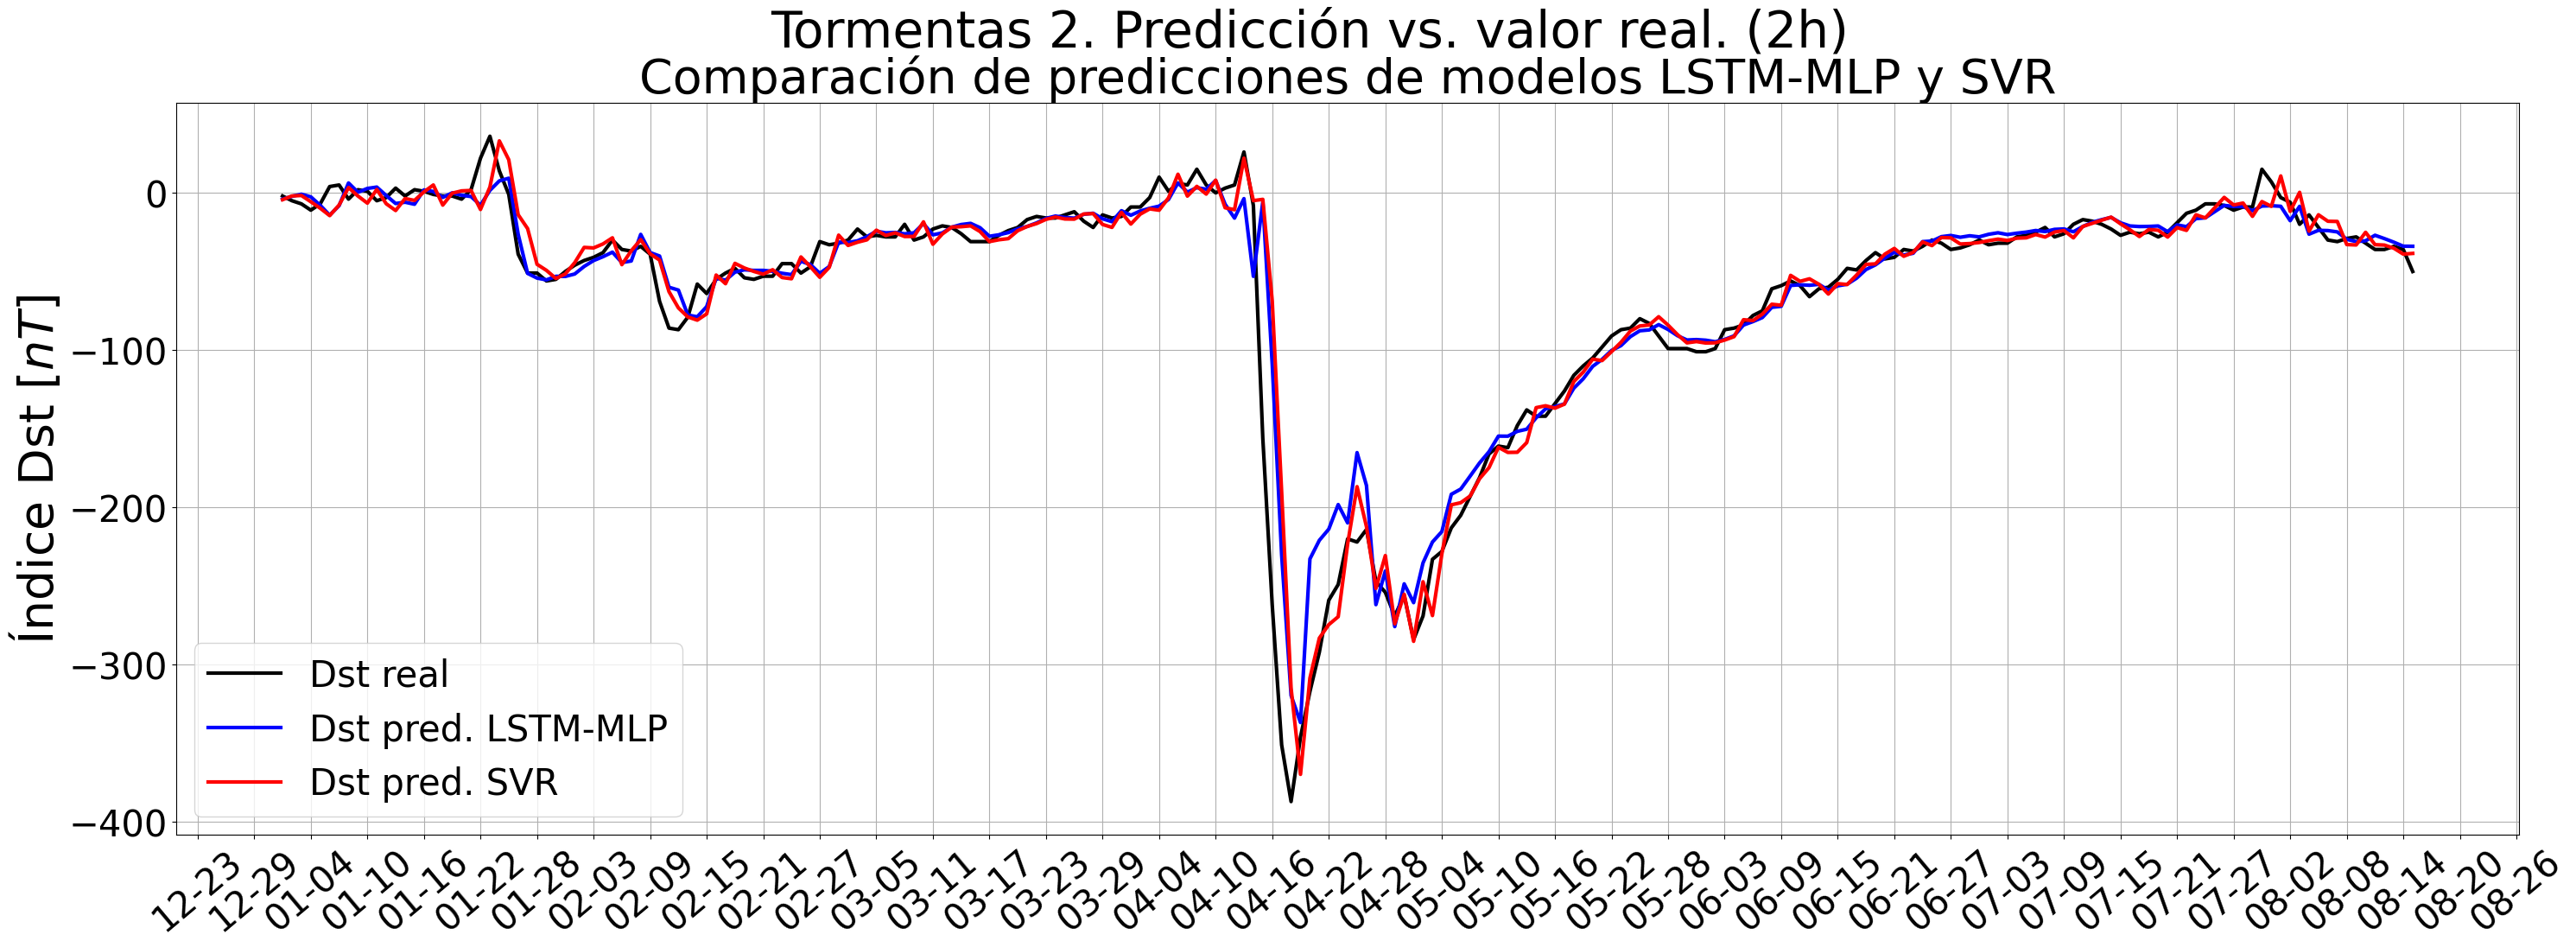

\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|}
\hline
Métrica & LSTM & SVR \\
\hline
RMSE & 21.635 & 22.348 \\
MSE & 468.073 & 499.436 \\
MAE & 10.206 & 9.546 \\
R² & 0.922 & 0.917 \\
MedAE & 5.410 & 5.106 \\
Var. expl. & 0.924 & 0.917 \\
Max error & 153.092 & 193.334 \\
\hline
\end{tabular}
\caption{Comparación de métricas entre LSTM y SVR}
\end{table}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Leer los datos
data_lstm = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/NN_2h_res_by_storm/storm_1.csv')
data_svr = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_2h_res_by_storm/storm_1.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data_lstm['Datetime_pred'], data_lstm['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data_lstm['Datetime_pred'], data_lstm['y_pred'], label='Dst pred. LSTM-MLP', linestyle='-', linewidth=3, color='blue')
plt.plot(data_svr['Datetime_pred'], data_svr['y_pred'], label='Dst pred. SVR', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('Comparación de predicciones de modelos LSTM-MLP y SVR', fontsize=40)
plt.suptitle('Tormentas 2. Predicción vs. valor real. (2h)', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)

# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


# Mostrar el gráfico
plt.show()

metrics_SVR = {
    "RMSE": 22.348063,
    "MSE": 499.435932,
    "MAE": 9.546276,
    "R²": 0.916815,
    "MedAE": 5.105864,
    "Var. expl.": 0.917468,
    "Max error": 193.333819
}


metrics_LSTM = {
    "RMSE": 21.634998,
    "MSE": 468.073152,
    "MAE": 10.205914,
    "R²": 0.922039,
    "MedAE": 5.410500,
    "Var. expl.": 0.923813,
    "Max error": 153.091980
}
# Crear una lista de las métricas
metric_names = ["RMSE", "MSE", "MAE", "R²", "MedAE", "Var. expl.", "Max error"]

# Generar la tabla en formato LaTeX
latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|l|c|c|}\n\\hline\n"
latex_table += "Métrica & LSTM & SVR \\\\\n\\hline\n"

for metric in metric_names:
    latex_table += f"{metric} & {metrics_LSTM[metric]:.3f} & {metrics_SVR[metric]:.3f} \\\\\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Comparación de métricas entre LSTM y SVR}\n\\end{table}"
print(latex_table)


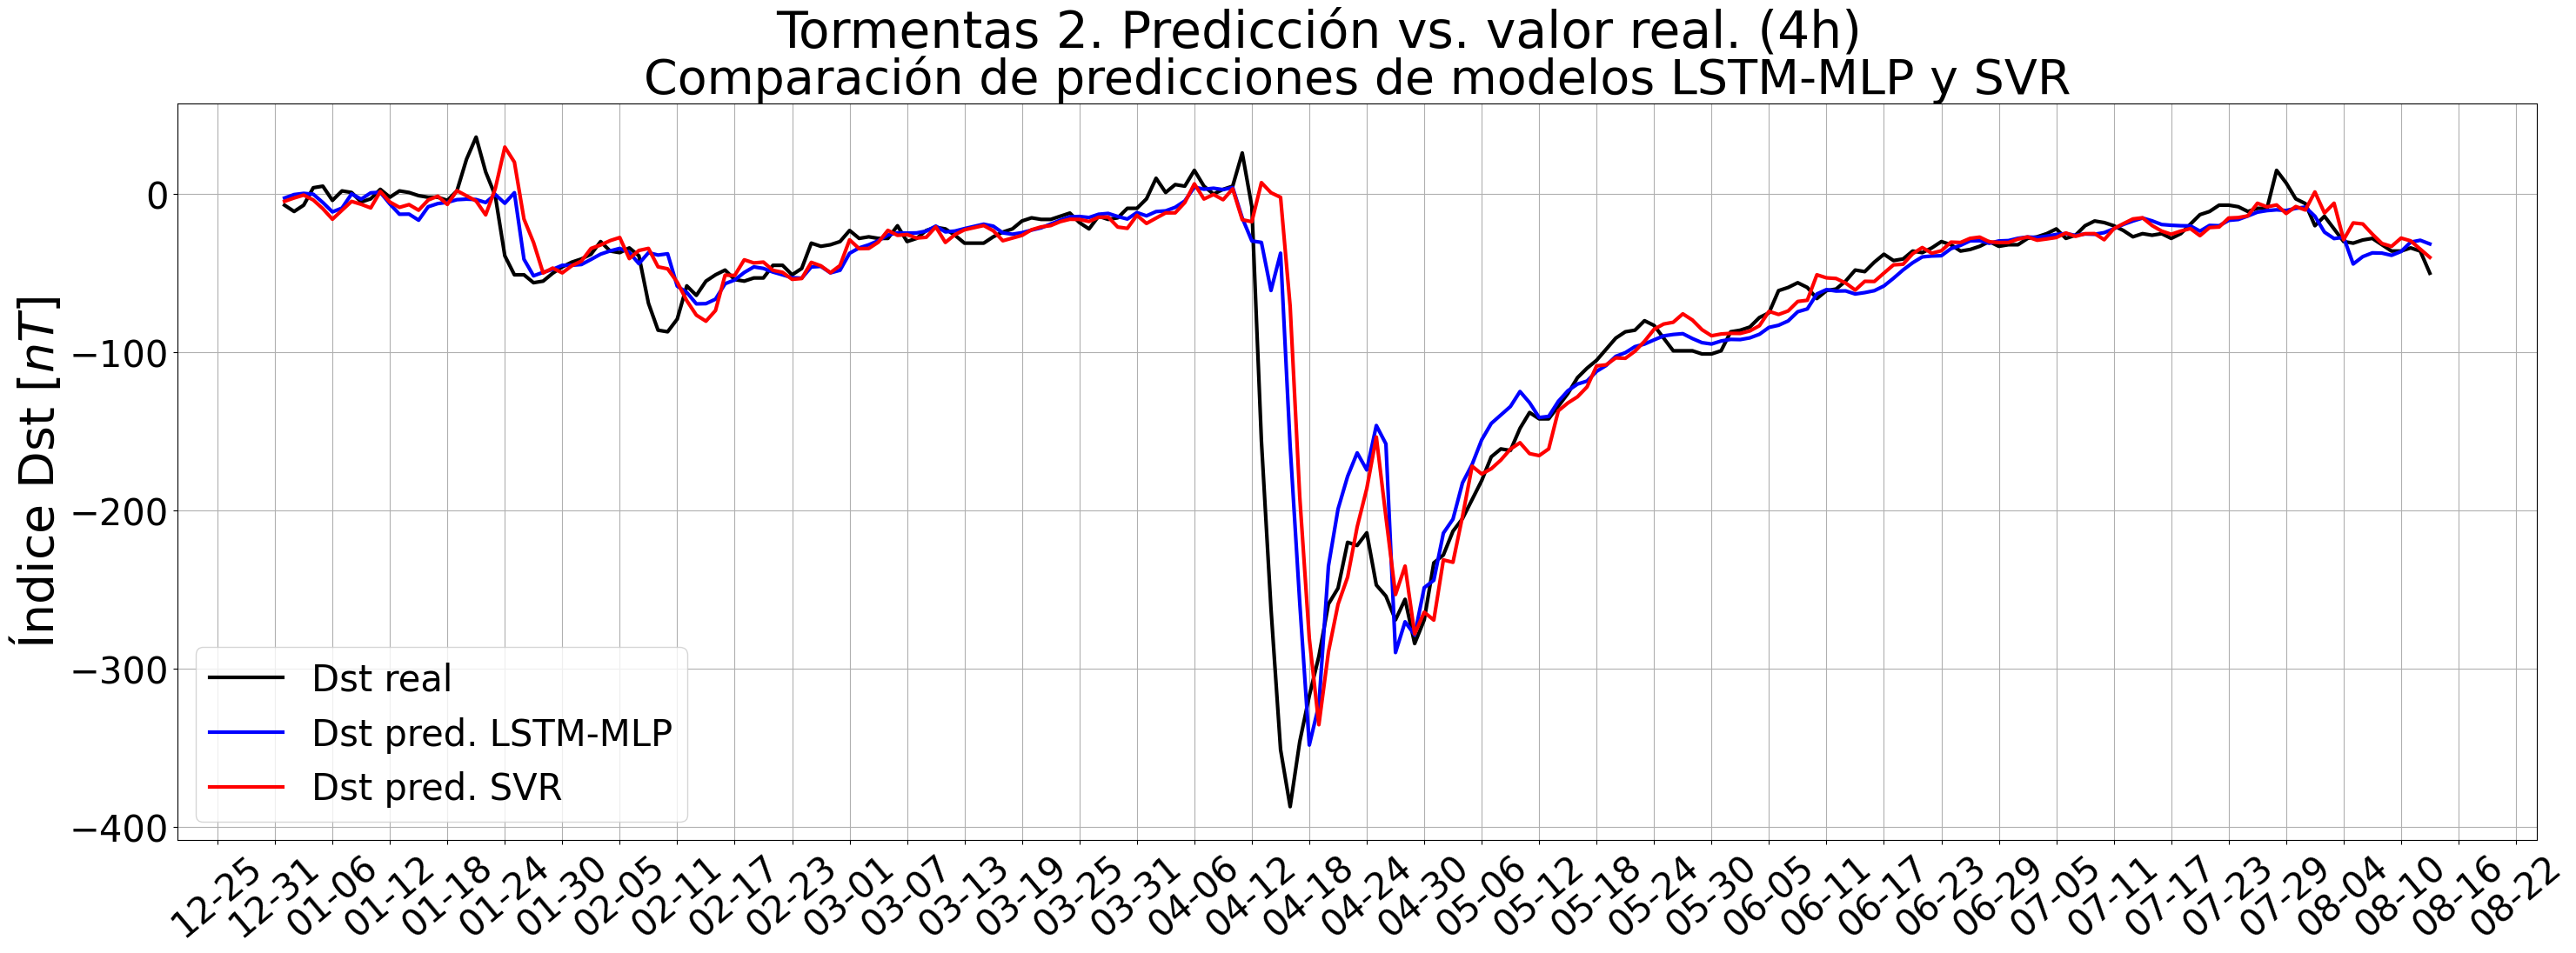

\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|}
\hline
Métrica & LSTM & SVR \\
\hline
RMSE & 21.635 & 22.348 \\
MSE & 468.073 & 499.436 \\
MAE & 10.206 & 9.546 \\
R² & 0.922 & 0.917 \\
MedAE & 5.410 & 5.106 \\
Var. expl. & 0.924 & 0.917 \\
Max error & 153.092 & 193.334 \\
\hline
\end{tabular}
\caption{Comparación de métricas entre LSTM y SVR}
\end{table}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Leer los datos
data_lstm = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/NN_4h_res_by_storm/storm_1.csv')
data_svr = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_4h_res_by_storm/storm_1.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data_lstm['Datetime_pred'], data_lstm['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data_lstm['Datetime_pred'], data_lstm['y_pred'], label='Dst pred. LSTM-MLP', linestyle='-', linewidth=3, color='blue')
plt.plot(data_svr['Datetime_pred'], data_svr['y_pred'], label='Dst pred. SVR', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('Comparación de predicciones de modelos LSTM-MLP y SVR', fontsize=40)
plt.suptitle('Tormentas 2. Predicción vs. valor real. (4h)', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)

# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Métricas
metrics_lstm = {
    "RMSE": 35.194288,
    "MSE": 1238.637936,
    "MAE": 14.759090,
    "R²": 0.794522,
    "MedAE": 6.846550,
    "Var. expl.": 0.797569,
    "Max error": 313.657509
}


metrics_svr = {
    "RMSE": 42.122828,
    "MSE": 1774.332639,
    "MAE": 15.878248,
    "R²": 0.705656,
    "MedAE": 7.021298,
    "Var. expl.": 0.709521,
    "Max error": 348.960677
}

# Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
metrics_text_lstm = "\n".join([f"LSTM-MLP {key}: {value:.3f}" for key, value in metrics_lstm.items()])
metrics_text_svr = "\n".join([f"SVR {key}: {value:.3f}" for key, value in metrics_svr.items()])

# plt.gcf().text(0.80, 0.30, metrics_text_lstm, fontsize=36, ha='center', va='center')
# plt.gcf().text(0.80, 0.50, metrics_text_svr, fontsize=36, ha='center', va='center')

# Mostrar el gráfico
plt.show()

# Crear una lista de las métricas
metric_names = ["RMSE", "MSE", "MAE", "R²", "MedAE", "Var. expl.", "Max error"]

# Generar la tabla en formato LaTeX
latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|l|c|c|}\n\\hline\n"
latex_table += "Métrica & LSTM & SVR \\\\\n\\hline\n"

for metric in metric_names:
    latex_table += f"{metric} & {metrics_LSTM[metric]:.3f} & {metrics_SVR[metric]:.3f} \\\\\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Comparación de métricas entre LSTM y SVR}\n\\end{table}"
print(latex_table)



\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|}
\hline
Métrica & LSTM & SVR \\
\hline
RMSE & 21.364 & 16.104 \\
MSE & 456.427 & 259.335 \\
MAE & 11.375 & 9.943 \\
R² & 0.731 & 0.847 \\
MedAE & 5.742 & 6.283 \\
Var. expl. & 0.742 & 0.853 \\
Max error & 125.381 & 84.868 \\
\hline
\end{tabular}
\caption{Comparación de métricas entre LSTM y SVR}
\end{table}


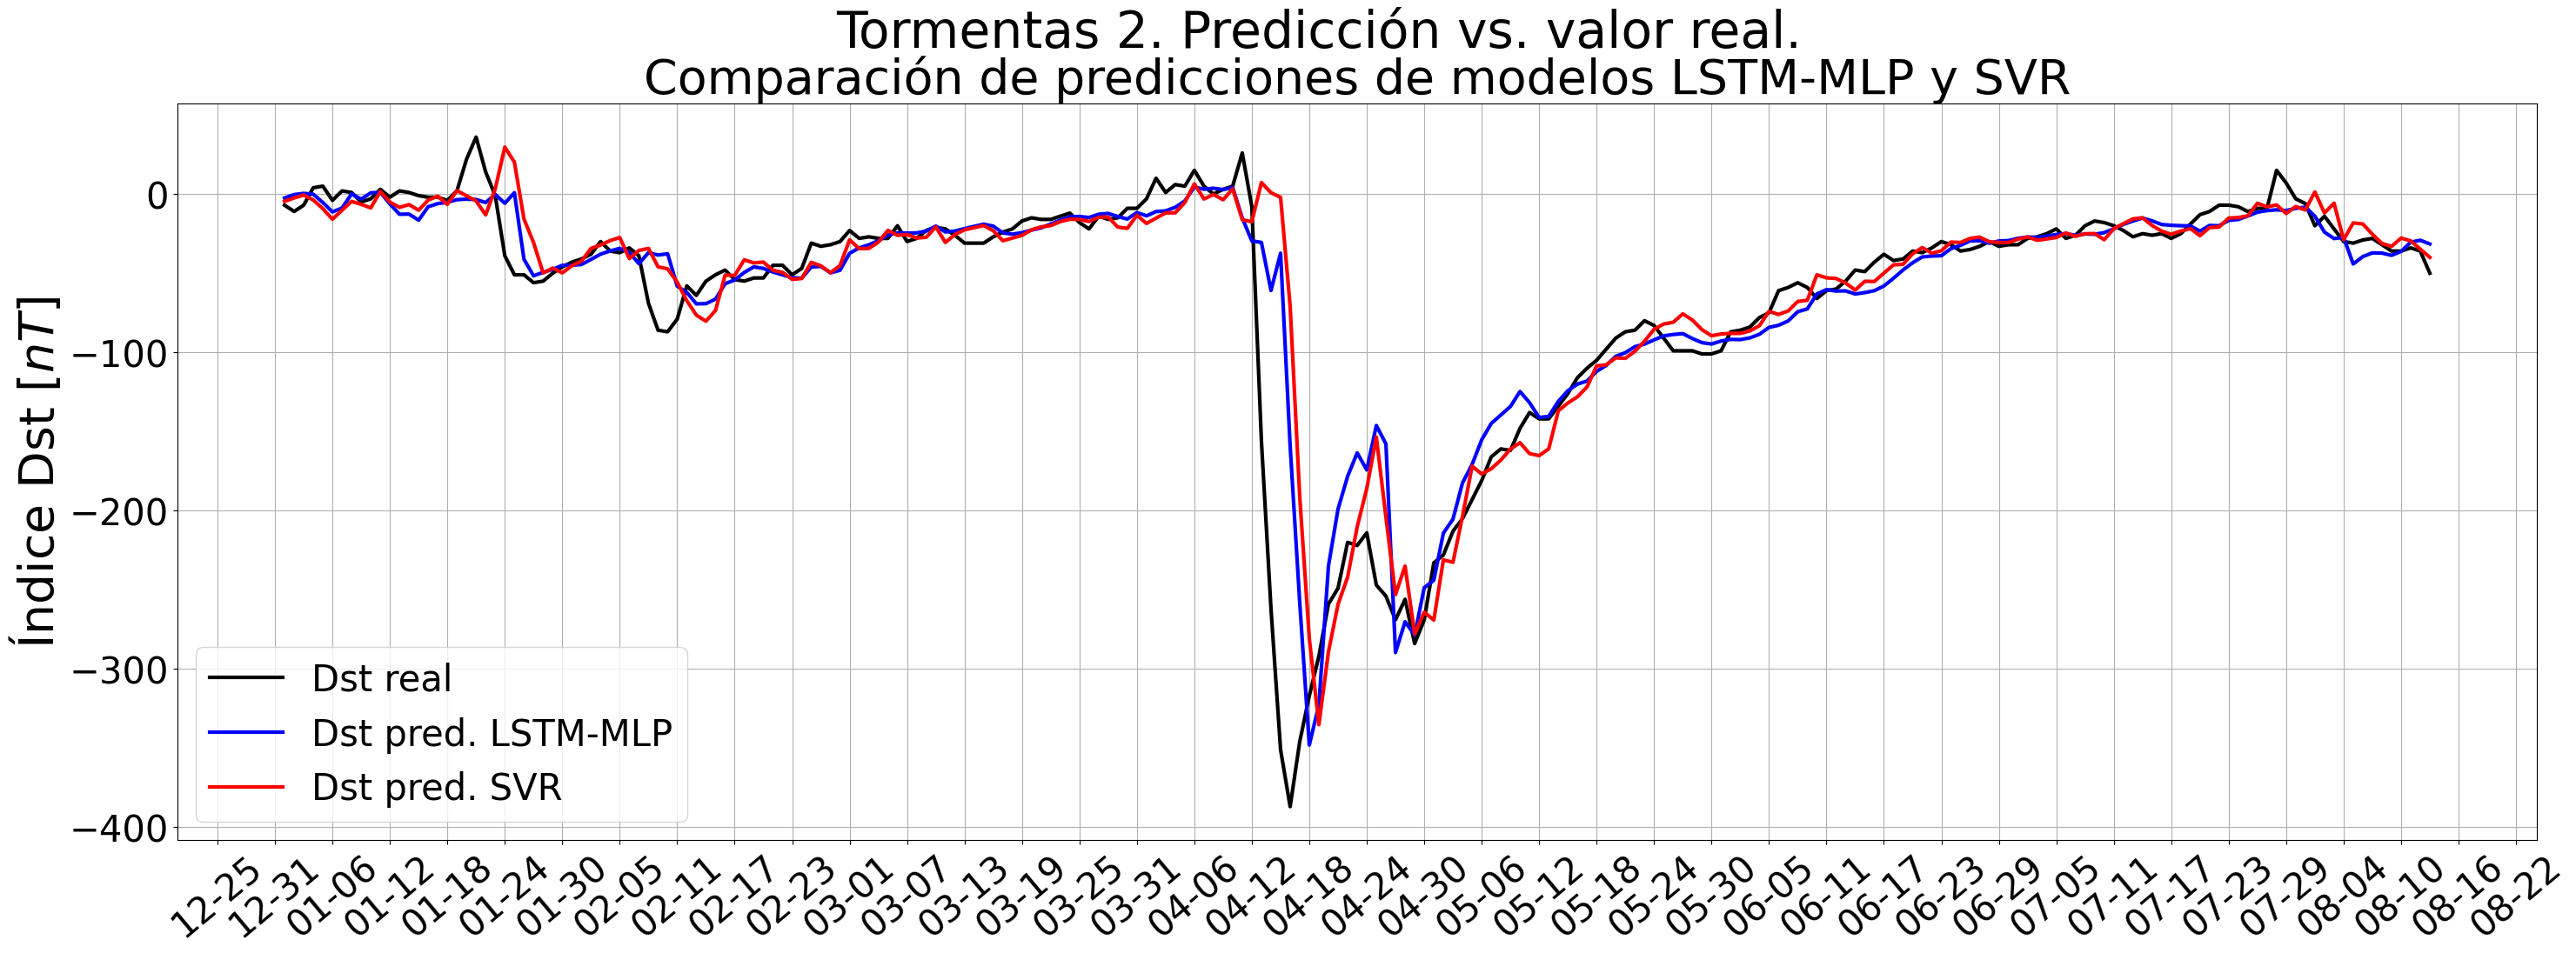

\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|}
\hline
Métrica & LSTM & SVR \\
\hline
RMSE & 46.795 & 52.861 \\
MSE & 2189.746 & 2794.292 \\
MAE & 21.587 & 21.158 \\
R² & 0.639 & 0.539 \\
MedAE & 10.754 & 9.254 \\
Var. expl. & 0.642 & 0.548 \\
Max error & 302.562 & 387.144 \\
\hline
\end{tabular}
\caption{Comparación de métricas entre LSTM y SVR}
\end{table}


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Leer los datos
data_lstm = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/NN_4h_res_by_storm/storm_1.csv')
data_svr = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_4h_res_by_storm/storm_1.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data_lstm['Datetime_pred'], data_lstm['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data_lstm['Datetime_pred'], data_lstm['y_pred'], label='Dst pred. LSTM-MLP', linestyle='-', linewidth=3, color='blue')
plt.plot(data_svr['Datetime_pred'], data_svr['y_pred'], label='Dst pred. SVR', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('Comparación de predicciones de modelos LSTM-MLP y SVR', fontsize=40)
plt.suptitle('Tormentas 2. Predicción vs. valor real.', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)

# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))


print(latex_table)

# # Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
# metrics_text_lstm = "\n".join([f"LSTM-MLP {key}: {value:.3f}" for key, value in metrics_lstm.items()])
# metrics_text_svr = "\n".join([f"SVR {key}: {value:.3f}" for key, value in metrics_svr.items()])

# plt.gcf().text(0.80, 0.30, metrics_text_lstm, fontsize=36, ha='center', va='center')
# plt.gcf().text(0.80, 0.50, metrics_text_svr, fontsize=36, ha='center', va='center')

# Mostrar el gráfico
plt.show()

metrics_LSTM = {
    "RMSE": 46.794725,
    "MSE": 2189.746328,
    "MAE": 21.587154,
    "R²": 0.638513,
    "MedAE": 10.754124,
    "Var. expl.": 0.641589,
    "Max error": 302.562057
}


metrics_SVR = {
    "RMSE": 52.861062,
    "MSE": 2794.291830,
    "MAE": 21.158415,
    "R²": 0.538713,
    "MedAE": 9.254333,
    "Var. expl.": 0.548496,
    "Max error": 387.143790
}

# Crear una lista de las métricas
metric_names = ["RMSE", "MSE", "MAE", "R²", "MedAE", "Var. expl.", "Max error"]

# Generar la tabla en formato LaTeX
latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|l|c|c|}\n\\hline\n"
latex_table += "Métrica & LSTM & SVR \\\\\n\\hline\n"

for metric in metric_names:
    latex_table += f"{metric} & {metrics_LSTM[metric]:.3f} & {metrics_SVR[metric]:.3f} \\\\\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Comparación de métricas entre LSTM y SVR}\n\\end{table}"

print(latex_table)


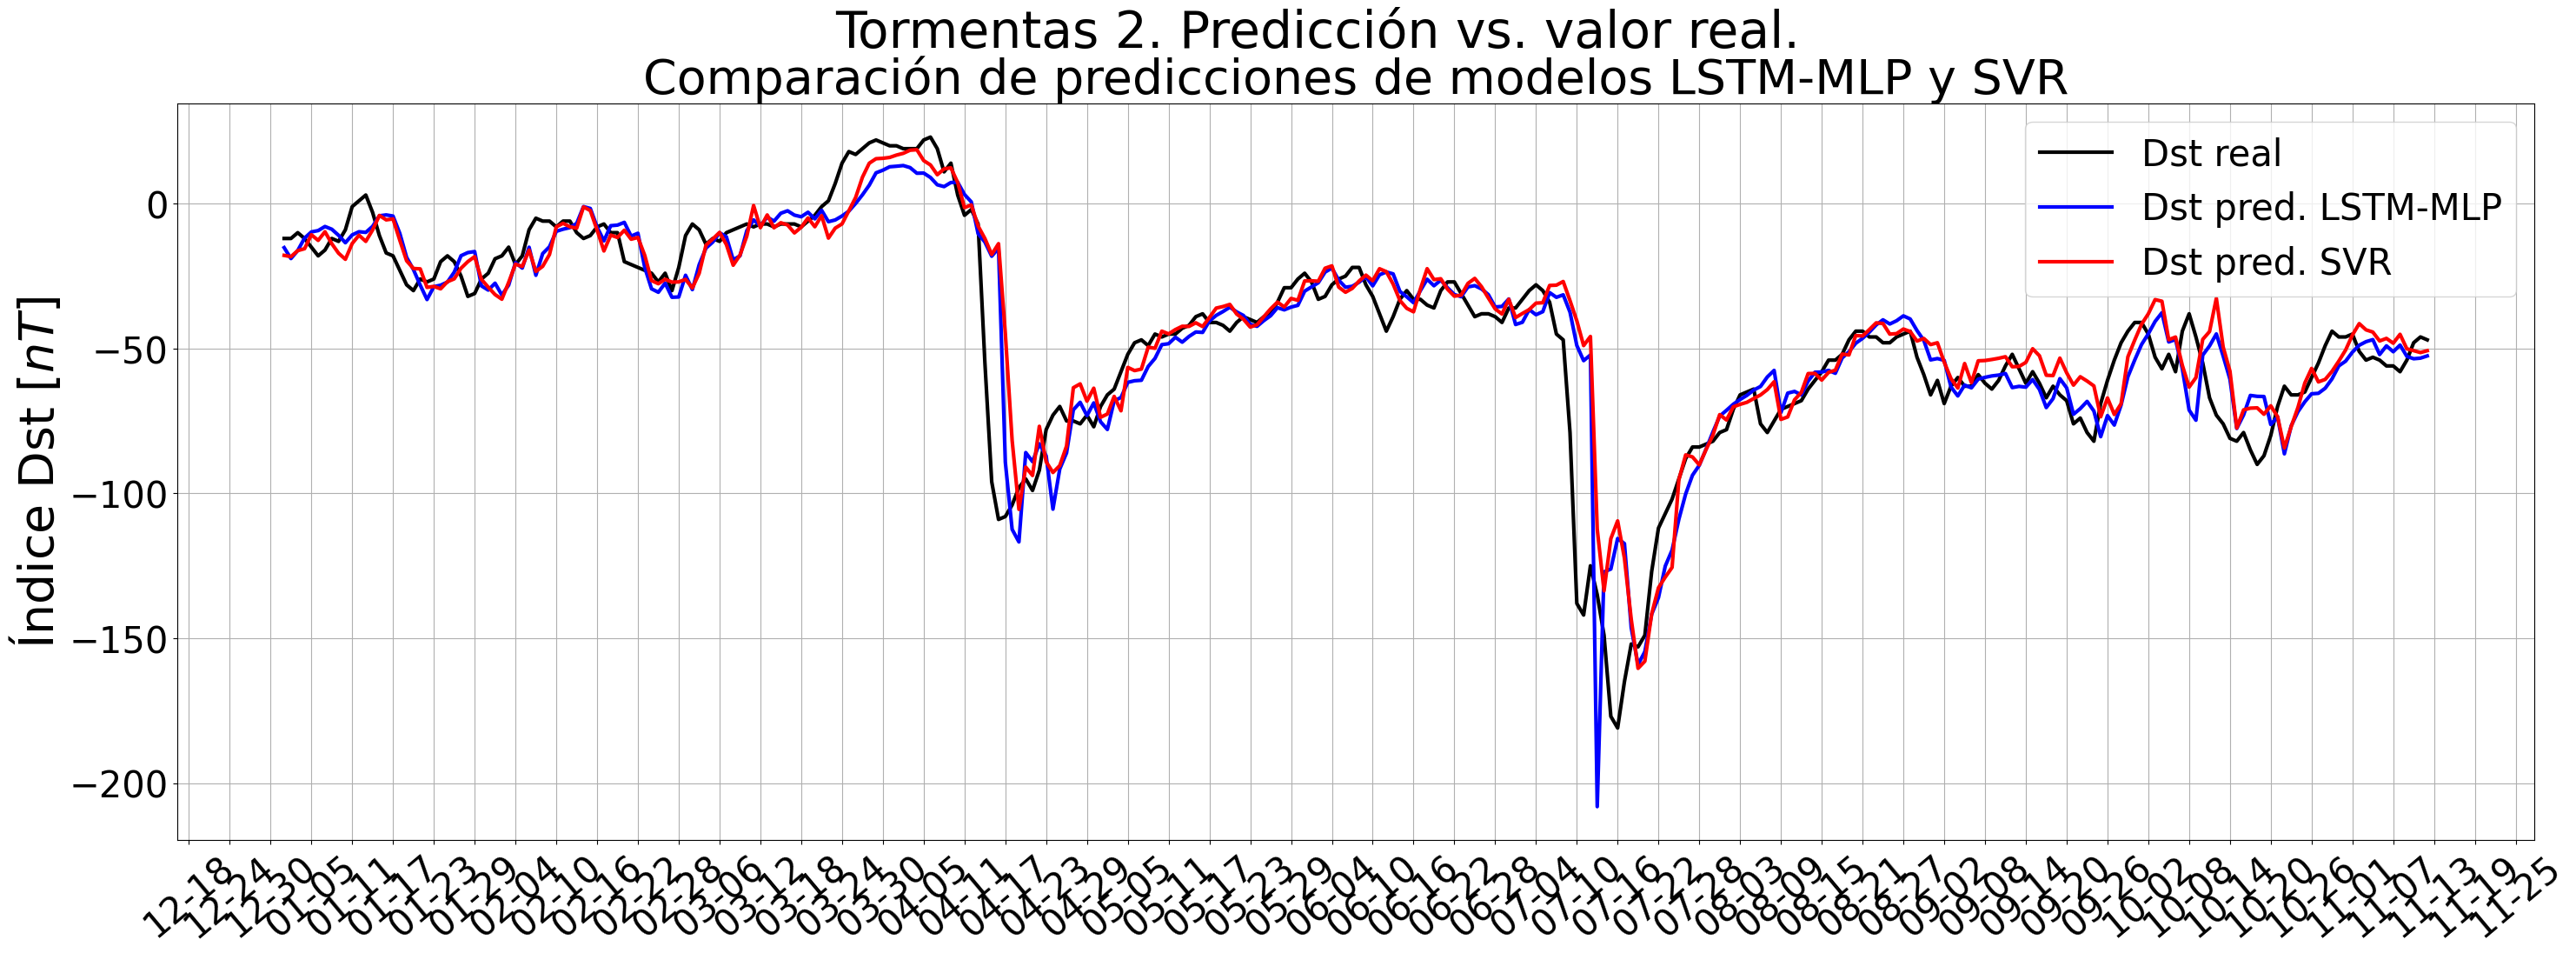

\begin{table}[ht]
\centering
\begin{tabular}{|l|c|c|}
\hline
Métrica & LSTM & SVR \\
\hline
RMSE & 21.364 & 16.104 \\
MSE & 456.427 & 259.335 \\
MAE & 11.375 & 9.943 \\
R² & 0.731 & 0.847 \\
MedAE & 5.742 & 6.283 \\
Var. expl. & 0.742 & 0.853 \\
Max error & 125.381 & 84.868 \\
\hline
\end{tabular}
\caption{Comparación de métricas entre LSTM y SVR}
\end{table}


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Leer los datos
data_lstm = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/NN_4h_res_by_storm/storm_4.csv')
data_svr = pd.read_csv('C:/Users/raqga/OneDrive - Universidad Complutense de Madrid (UCM)/Documentos/tsa4dst/RESULTADOS/SVR_4h_res_by_storm/storm_4.csv')

# Configurar el tamaño de la figura y crear el gráfico con los requisitos especificados
plt.figure(figsize=(35, 11))

# Graficar los valores reales y las predicciones con colores y estilos especificados
plt.plot(data_lstm['Datetime_pred'], data_lstm['y_true'], label='Dst real', linestyle='-', linewidth=3, color='black')
plt.plot(data_lstm['Datetime_pred'], data_lstm['y_pred'], label='Dst pred. LSTM-MLP', linestyle='-', linewidth=3, color='blue')
plt.plot(data_svr['Datetime_pred'], data_svr['y_pred'], label='Dst pred. SVR', linestyle='-', linewidth=3, color='red')

# Personalizar el gráfico
plt.title('Comparación de predicciones de modelos LSTM-MLP y SVR', fontsize=40)
plt.suptitle('Tormentas 2. Predicción vs. valor real.', fontsize=42)
plt.ylabel('Índice Dst [$nT$]', fontsize=40)
plt.legend(fontsize=30)
plt.grid(True)


# Ajustar etiquetas x para mostrar menos etiquetas
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# Ajustar las etiquetas de los ejes x e y
plt.xticks(fontsize=30, rotation=40)
plt.yticks(fontsize=30)


# # Añadir las métricas como texto en el gráfico, ajustando la posición y el tamaño de la fuente
# metrics_text_lstm = "\n".join([f"LSTM-MLP {key}: {value:.3f}" for key, value in metrics_lstm.items()])
# # metrics_text_svr = "\n".join([f"SVR {key}: {value:.3f}" for key, value in metrics_svr.items()])

# plt.gcf().text(0.80, 0.30, metrics_text_lstm, fontsize=36, ha='center', va='center')
# plt.gcf().text(0.80, 0.50, metrics_text_svr, fontsize=36, ha='center', va='center')

# Mostrar el gráfico
plt.show()


metrics_LSTM = {
    "RMSE": 21.364146,
    "MSE": 456.426749,
    "MAE": 11.37497,
    "R²": 0.730541,
    "MedAE": 5.742311,
    "Var. expl.": 0.741942,
    "Max error": 125.381317
}

metrics_SVR = {
    "RMSE": 16.103868,
    "MSE": 259.334552,
    "MAE": 9.942646,
    "R²": 0.846898,
    "MedAE": 6.282848,
    "Var. expl.": 0.853427,
    "Max error": 84.868373
}



# Crear una lista de las métricas
metric_names = ["RMSE", "MSE", "MAE", "R²", "MedAE", "Var. expl.", "Max error"]

# Generar la tabla en formato LaTeX
latex_table = "\\begin{table}[ht]\n\\centering\n\\begin{tabular}{|l|c|c|}\n\\hline\n"
latex_table += "Métrica & LSTM & SVR \\\\\n\\hline\n"

for metric in metric_names:
    latex_table += f"{metric} & {metrics_LSTM[metric]:.3f} & {metrics_SVR[metric]:.3f} \\\\\n"

latex_table += "\\hline\n\\end{tabular}\n\\caption{Comparación de métricas entre LSTM y SVR}\n\\end{table}"

print(latex_table)
